#**EXPLORATORY DATA ANALYSIS**

### **Importing Library and Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Project/Bike_Sharing/Dataset/hour.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Project/Bike_Sharing/Dataset/day.csv')

In [4]:
df.info()

# from this function we can see that there is no null value in each features/column
# so we can go to the next step

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [79]:
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# we try to prevent something happened to the real dataset
# for that reason we duplicate the dataset and label it with 'bike'

# we rename the columns into something that is easy to read
# and we replace several values from numeric (like weekday, season, weather_condition, month) into categorical
# these changes is for simplify when we create the graph


# from what we research, the dataset of column temp, atemp, windspeed, and humidity has been normalized
# we reverse those into real scale so that the EDA will show the actual values of each column

bike = df.copy()
bike.drop(columns=['instant'],axis=1,inplace=True)
bike.rename(columns={'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'cnt':'count',
                        'mnth':'month',
                        'yr':'year'
                     },inplace=True)
bike['dteday'] = pd.to_datetime(bike['dteday'])
bike['year'] = bike['dteday'].dt.year
bike['month'] = bike['dteday'].dt.month
bike['day'] = bike['dteday'].dt.day
bike['temp'] = bike['temp']*41
bike['atemp'] = bike['atemp']*50
bike['windspeed'] = bike['windspeed']*67
bike['humidity'] = bike['humidity']*100
bike['weekday'] = bike['weekday'].map({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',0:'Sunday'})
bike['weather_condition'] = bike['weather_condition'].map({1:'Clear', 2:'Cloudy', 3:'Light Rain', 4:'Heavy Rain'})
bike['season'] = bike['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike['month'] = bike['month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
bike['is_holiday'] = bike['is_holiday'].map({0:'No', 1:'Yes'})
bike['is_workingday'] = bike['is_workingday'].map({0:'No', 1:'Yes'})
bike

,dteday,season,year,month,hr,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01,Spring,2011,January,0,No,Saturday,No,Clear,9.84,14.395,81.0,0.0000,3,13,16,1
1,2011-01-01,Spring,2011,January,1,No,Saturday,No,Clear,9.02,13.635,80.0,0.0000,8,32,40,1
2,2011-01-01,Spring,2011,January,2,No,Saturday,No,Clear,9.02,13.635,80.0,0.0000,5,27,32,1
3,2011-01-01,Spring,2011,January,3,No,Saturday,No,Clear,9.84,14.395,75.0,0.0000,3,10,13,1
4,2011-01-01,Spring,2011,January,4,No,Saturday,No,Clear,9.84,14.395,75.0,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,2012,December,19,No,Monday,Yes,Cloudy,10.66,12.880,60.0,11.0014,11,108,119,31
17375,2012-12-31,Spring,2012,December,20,No,Monday,Yes,Cloudy,10.66,12.880,60.0,11.0014,8,81,89,31
17376,2012-12-31,Spring,2012,December,21,No,Monday,Yes,Clear,10.66,12.880,60.0,11.0014,7,83,90,31
17377,2012-12-31,Spring,2012,December,22,No,Monday,Yes,Clear,10.66,13.635,56.0,8.9981,13,48,61,31


In [7]:
bike['date']= bike['dteday'].dt.day
bike

,dteday,season,year,month,hr,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,day,date
0,2011-01-01,Spring,2011,January,0,No,Saturday,No,Clear,9.84,14.395,81.0,0.0000,3,13,16,1,1
1,2011-01-01,Spring,2011,January,1,No,Saturday,No,Clear,9.02,13.635,80.0,0.0000,8,32,40,1,1
2,2011-01-01,Spring,2011,January,2,No,Saturday,No,Clear,9.02,13.635,80.0,0.0000,5,27,32,1,1
3,2011-01-01,Spring,2011,January,3,No,Saturday,No,Clear,9.84,14.395,75.0,0.0000,3,10,13,1,1
4,2011-01-01,Spring,2011,January,4,No,Saturday,No,Clear,9.84,14.395,75.0,0.0000,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,2012,December,19,No,Monday,Yes,Cloudy,10.66,12.880,60.0,11.0014,11,108,119,31,31
17375,2012-12-31,Spring,2012,December,20,No,Monday,Yes,Cloudy,10.66,12.880,60.0,11.0014,8,81,89,31,31
17376,2012-12-31,Spring,2012,December,21,No,Monday,Yes,Clear,10.66,12.880,60.0,11.0014,7,83,90,31,31
17377,2012-12-31,Spring,2012,December,22,No,Monday,Yes,Clear,10.66,13.635,56.0,8.9981,13,48,61,31,31


## **PROBLEM STATEMENT**

After seeing the dataset, there are several questions that arise. First, we would like to see how the sales going on in 2011 and 2012. What pattern show up between 2011 and 2012. And what should we do with this given information?

#### SALES TREND FROM 2011 - 2012

In [15]:
# before any further action, we decide to create an order for several columns. This might help when later on we are grouping values

# ordering month
order_mth = pd.CategoricalDtype(
    ['January','February','March','April','May','June', 'July', 'August', 'September','October','November','December'], 
    ordered=True)

#ordering weekday
order_weekday = pd.CategoricalDtype(
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday'], 
    ordered=True)

#ordering month on fall season
order_fall = pd.CategoricalDtype(
    ['June', 'July', 'August', 'September'], 
    ordered=True
)
#ordering season
order_season = pd.CategoricalDtype(
    ['Spring', 'Summer', 'Fall', 'Winter'], 
    ordered=True
)

In [9]:
bike_summary = pd.DataFrame(bike.groupby(['year']).sum()[['casual','registered','count']]).reset_index()
bike_summary

,year,casual,registered,count
0,2011,247252,995851,1243103
1,2012,372765,1676811,2049576


In [10]:
#sum bike rented each month from 2011-2012

bike_sum_mth = pd.DataFrame(bike.groupby(['year','month']).sum()[['casual','registered','count']]).reset_index()
bike_sum_mth['month']=bike_sum_mth['month'].astype(order_mth)
bike_sum_mth = bike_sum_mth.sort_values(['year','month'])
bike_sum_mth

,year,month,casual,registered,count
4,2011,January,3073,35116,38189
3,2011,February,6242,41973,48215
7,2011,March,12826,51219,64045
0,2011,April,22346,72524,94870
8,2011,May,31050,104771,135821
6,2011,June,30612,112900,143512
5,2011,July,36452,104889,141341
1,2011,August,28842,107849,136691
11,2011,September,26545,100873,127418
10,2011,October,25222,98289,123511


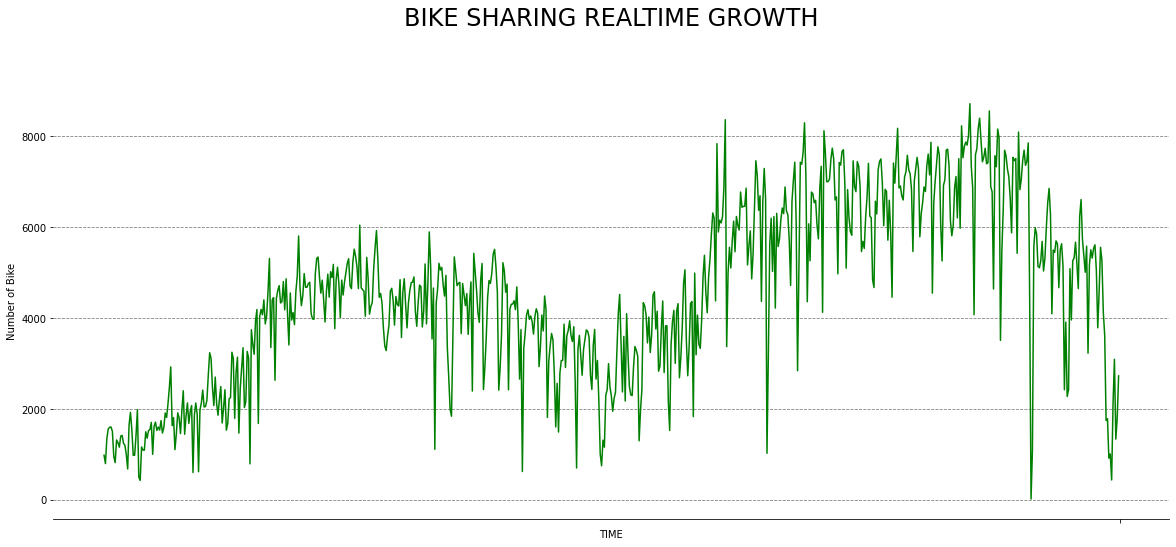

In [100]:
fig, ax = plt.subplots(figsize=(20,8))                                                         
sns.lineplot(data=df2, x='dteday', y='cnt', color='green')           
sns.despine(top=True, right=True, left=True, bottom=False)                                     
plt.xlabel('TIME')
plt.xticks('')                      
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')                                                      
plt.ylabel('Number of Bike')
plt.title('BIKE SHARING REALTIME GROWTH', size=24, y=1.12)                                          

plt.show()

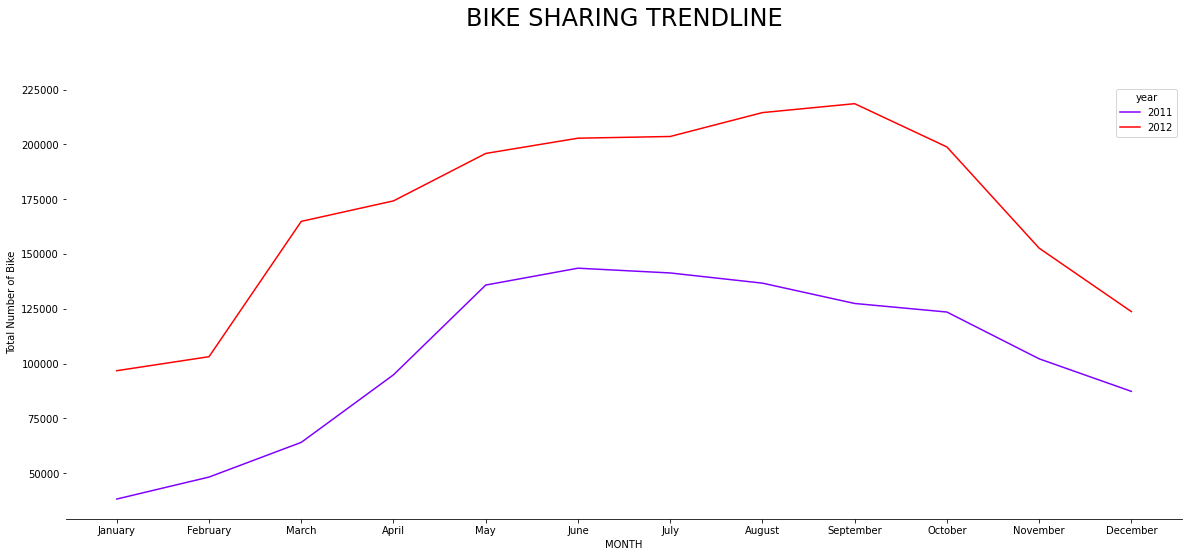

In [105]:
fig, ax = plt.subplots(figsize=(20,8))                                                         
sns.lineplot(data=bike_sum_mth, x='month', y='count', hue='year', palette='rainbow')           
sns.despine(top=True, right=True, left=True, bottom=False)                                     
plt.xlabel('MONTH')                                                                            
plt.ylabel('Total Number of Bike')
plt.title('BIKE SHARING TRENDLINE', size=24, y=1.12)                                          

plt.show()

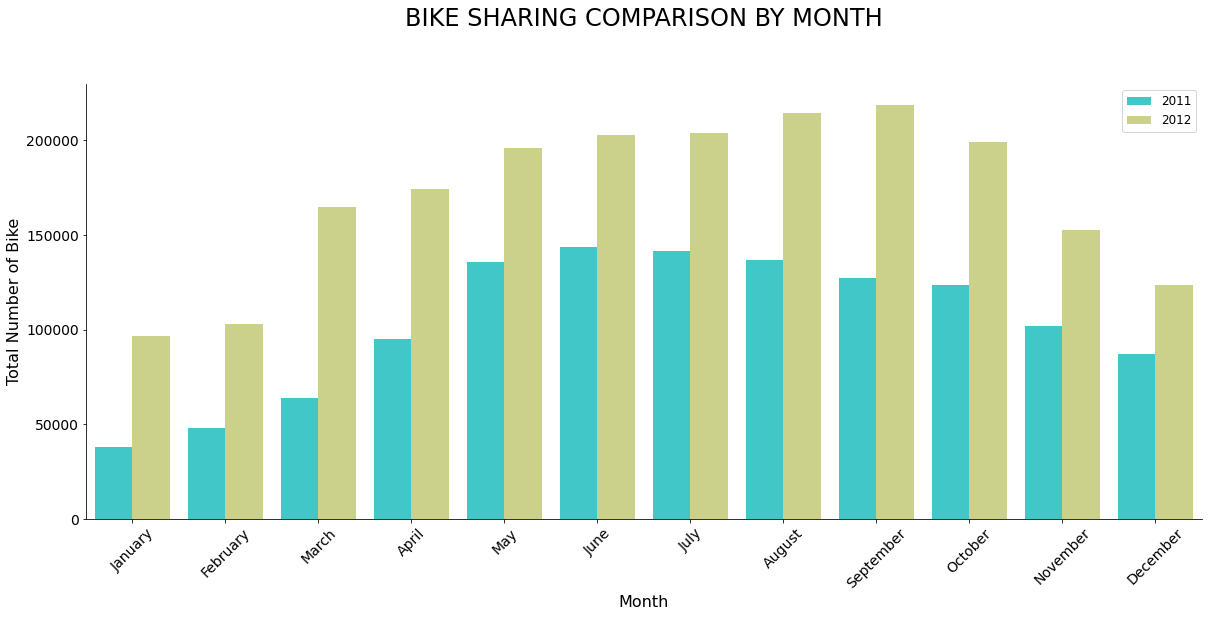

In [106]:
fig, ax = plt.subplots(figsize=(20,8))                                                          
sns.barplot(data = bike_sum_mth, x='month',y='count',hue='year',ci=None,palette='rainbow')          
sns.despine(top=True, right=True, left=False, bottom=False)                                     
plt.xlabel('Month', size = 16)                                                                  
plt.ylabel('Total Number of Bike', size = 16)
plt.xticks(rotation=45, size=14)                                                                
plt.yticks(size=14)
plt.title('BIKE SHARING COMPARISON BY MONTH', size=24, y=1.12)                                         
plt.legend(loc=0, prop={'size': 12})

plt.show()

both plot showing us that bike sharing's sales are increasing from 2011 to 2012. These years apply similar trend, which has significant increase in slope from January until May. And then the bike sharing's sales are begin to decrease slowly until December, except in 2012 the sales increase until it reach its peak in September and after that it decrease until December. We could see that in every last 3 months the sales are going down. We have asumption this is because of these months are known for winter season which we think that the weather condition affect the usage of bike.

In [12]:
# sum bike rented each season in 2011 and 2012 

bike_season = pd.DataFrame(bike.groupby(['year','season']).sum()[['casual','registered','count']]).reset_index()
bike_season

,year,season,casual,registered,count
0,2011,Fall,95450,324200,419650
1,2011,Spring,21425,128575,150000
2,2011,Summer,77564,269752,347316
3,2011,Winter,52813,273324,326137
4,2012,Fall,130641,510838,641479
5,2012,Spring,39197,282151,321348
6,2012,Summer,125958,445315,571273
7,2012,Winter,76969,438507,515476


In [16]:
bike_season['season']=bike_season['season'].astype(order_season)
bike_season = bike_season.sort_values('year')
bike_season

,year,season,casual,registered,count
0,2011,Fall,95450,324200,419650
1,2011,Spring,21425,128575,150000
2,2011,Summer,77564,269752,347316
3,2011,Winter,52813,273324,326137
4,2012,Fall,130641,510838,641479
5,2012,Spring,39197,282151,321348
6,2012,Summer,125958,445315,571273
7,2012,Winter,76969,438507,515476


In [18]:
bike_fall = bike[(bike['season']=='Fall') & (bike['year']==2012)].groupby(['month']).sum()[['casual','registered','count']].reset_index()
bike_fall['month'] = bike_fall['month'].astype(order_fall)
bike_fall = bike_fall.sort_values('month')
bike_fall

,month,casual,registered,count
2,June,13448,52214,65662
1,July,41705,161902,203607
0,August,43197,171306,214503
3,September,32291,125416,157707


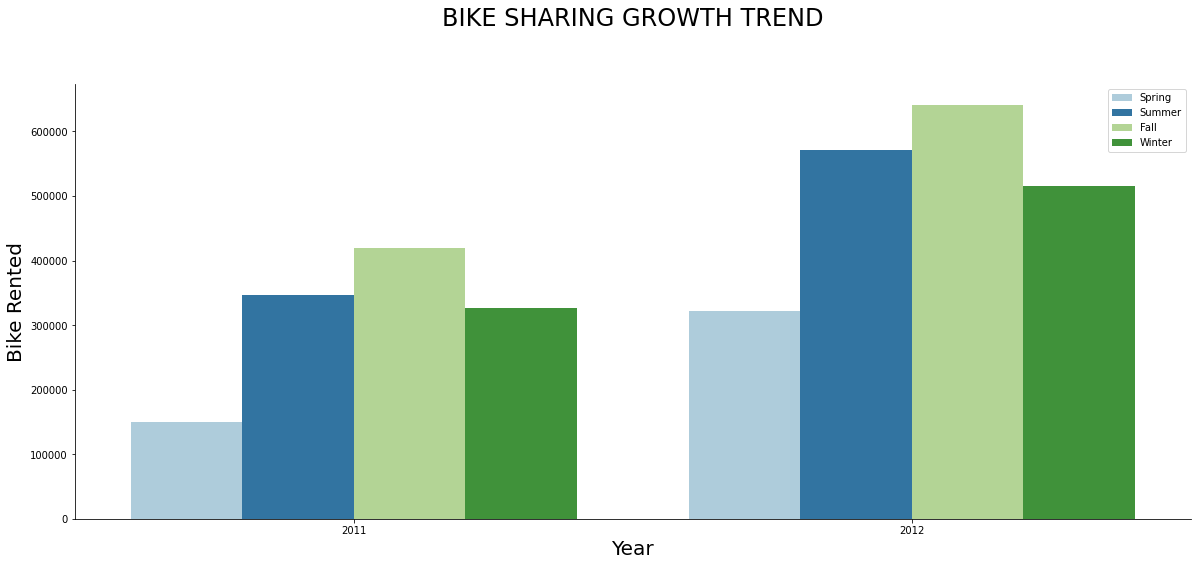

In [17]:
fig, ax = plt.subplots(figsize=(20,8))                                                     

sns.barplot(data = bike_season, x='year',y='count',hue='season',ci=None,palette='Paired')   
sns.despine(top=True, right=True, left=False, bottom=False)                                
plt.legend(title='Season', loc='best', frameon=False)                                      
plt.xlabel('Year', size=20)                                                                 
plt.ylabel('Bike Rented',size=20)
plt.xticks(size=10)                                                                         
plt.yticks(size=10)
plt.title('BIKE SHARING GROWTH TREND', size=24, y=1.12)                                     
plt.legend(loc=0, prop={'size': 10})

plt.show()

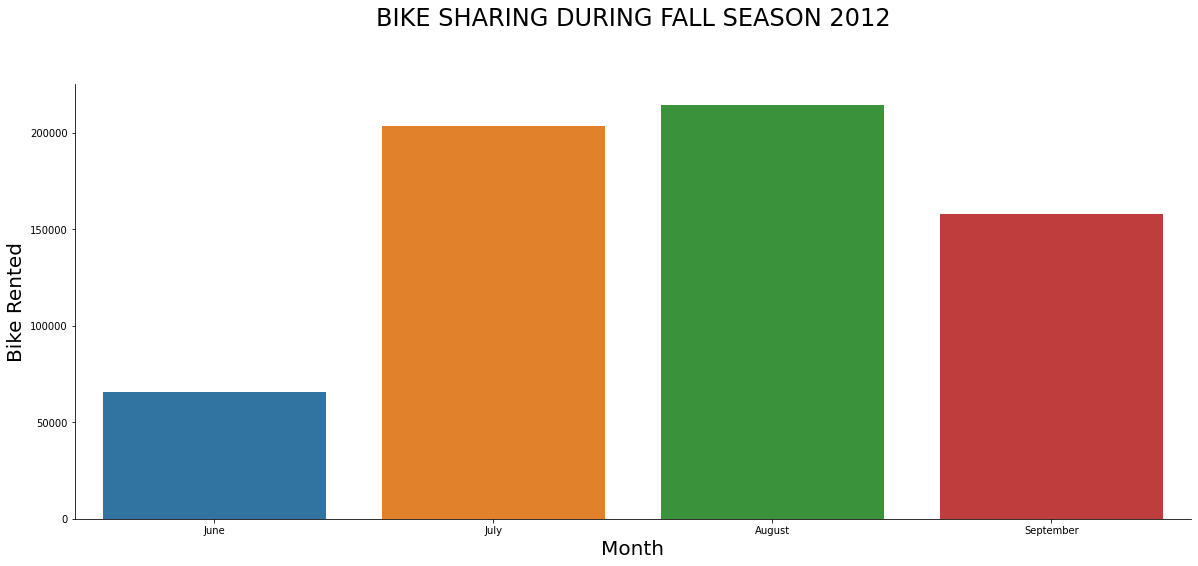

In [19]:
fig, ax = plt.subplots(figsize=(20,8))                                                     

sns.barplot(data = bike_fall, x='month', y='count')
sns.despine(top=True, right=True, left=False, bottom=False)                                                                    
plt.xlabel('Month', size=20)                                                                 
plt.ylabel('Bike Rented',size=20)
plt.xticks(size=10)                                                                         
plt.yticks(size=10)
plt.title('BIKE SHARING DURING FALL SEASON 2012', size=24, y=1.12)                                    

plt.show()

In [20]:
august_2012 = bike[(bike['season']=='Fall') & (bike['year']==2012) & (bike['month']=='August')]
august_2012

,dteday,season,year,month,hr,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,day,date
13747,2012-08-01,Fall,2012,August,0,No,Wednesday,Yes,Clear,27.88,31.820,79.0,11.0014,3,44,47,1,1
13748,2012-08-01,Fall,2012,August,1,No,Wednesday,Yes,Clear,27.06,30.305,83.0,6.0032,5,28,33,1,1
13749,2012-08-01,Fall,2012,August,2,No,Wednesday,Yes,Clear,26.24,28.790,83.0,7.0015,0,13,13,1,1
13750,2012-08-01,Fall,2012,August,3,No,Wednesday,Yes,Clear,26.24,28.790,83.0,7.0015,0,7,7,1,1
13751,2012-08-01,Fall,2012,August,4,No,Wednesday,Yes,Cloudy,26.24,29.545,78.0,8.9981,1,3,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14486,2012-08-31,Fall,2012,August,19,No,Friday,Yes,Clear,32.80,37.120,49.0,8.9981,91,361,452,31,31
14487,2012-08-31,Fall,2012,August,20,No,Friday,Yes,Clear,32.80,37.120,49.0,8.9981,102,254,356,31,31
14488,2012-08-31,Fall,2012,August,21,No,Friday,Yes,Clear,31.16,35.605,58.0,12.9980,71,232,303,31,31
14489,2012-08-31,Fall,2012,August,22,No,Friday,Yes,Clear,31.16,35.605,58.0,12.9980,65,212,277,31,31


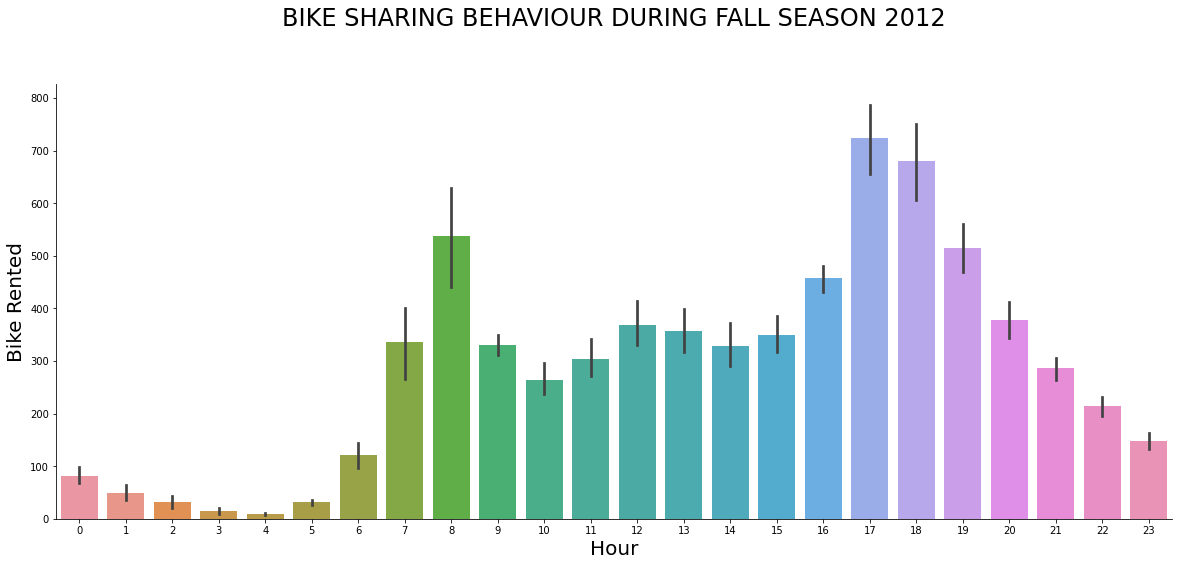

In [21]:
fig, ax = plt.subplots(figsize=(20,8))                                                     

sns.barplot(data = august_2012, x='hr', y='count')
sns.despine(top=True, right=True, left=False, bottom=False)                                                                    
plt.xlabel('Hour', size=20)                                                                 
plt.ylabel('Bike Rented',size=20)
plt.xticks(size=10)                                                                         
plt.yticks(size=10)
plt.title('BIKE SHARING BEHAVIOUR DURING FALL SEASON 2012', size=24, y=1.12)                                    

plt.show()

# **WHICH DAY HAVE THE MOST BIKE RENTED ON AVERAGE ?**

In [22]:
#average bike rented each weekday from 2011-2012

bike_avg_day = pd.DataFrame(bike.groupby(['year','weekday']).mean()[['casual','registered','count']]).reset_index()
bike_avg_day['weekday']=bike_avg_day['weekday'].astype(order_weekday)
bike_avg_day = bike_avg_day.sort_values(['year','weekday'])
bike_avg_day

,year,weekday,casual,registered,count
3,2011,Sunday,48.418359,95.427295,143.845654
1,2011,Monday,25.554656,120.373279,145.927935
5,2011,Tuesday,19.630933,127.945172,147.576105
6,2011,Wednesday,16.810415,120.837266,137.647681
4,2011,Thursday,18.318367,124.173061,142.491429
0,2011,Friday,23.771590,123.125908,146.897498
2,2011,Saturday,47.109968,95.091772,142.201741
10,2012,Sunday,63.664831,146.369001,210.033832
8,2012,Monday,31.530547,189.757235,221.287781
12,2012,Tuesday,27.501219,207.081235,234.582453


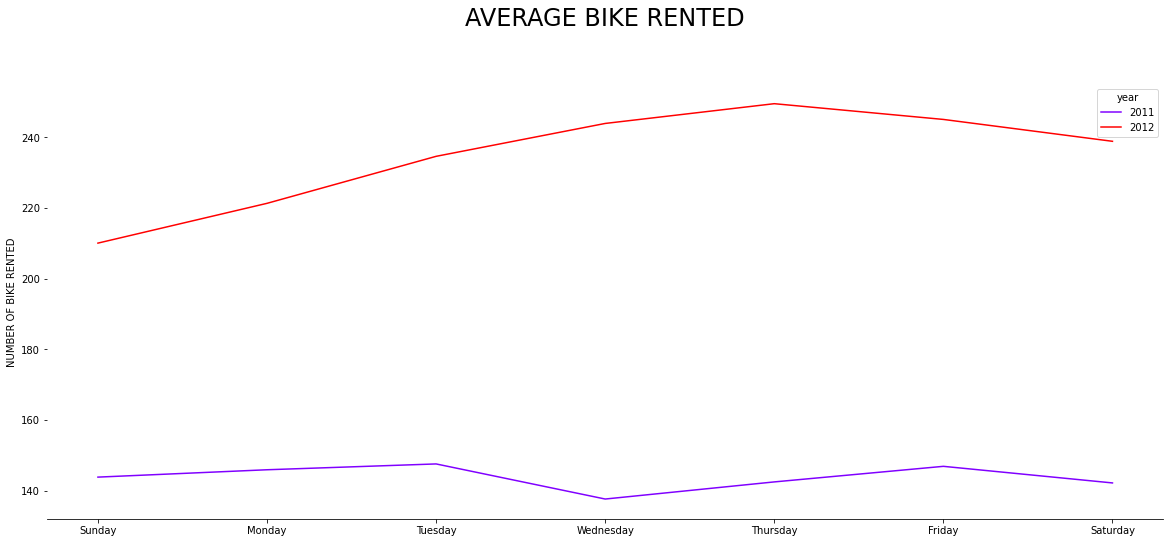

In [23]:
fig, ax = plt.subplots(figsize=(20,8))                                                          
sns.lineplot(data=bike_avg_day, x='weekday', y='count', hue='year', palette='rainbow', ci=False)                
sns.despine(top=True, right=True, left=True, bottom=False)                                      
plt.xlabel('')                                                                             
plt.ylabel('NUMBER OF BIKE RENTED')
plt.title('AVERAGE BIKE RENTED', size=24, y=1.12)                                          
plt.show()

In [24]:
bike_avg_day = pd.DataFrame(bike.groupby(['year','month','weekday']).mean()[['casual','registered','count']]).reset_index()
bike_avg_day['weekday']=bike_avg_day['weekday'].astype(order_weekday)
bike_avg_day['month']=bike_avg_day['month'].astype(order_mth)
bike_avg_day['casual']= round(bike_avg_day['casual'],ndigits=None)
bike_avg_day['registered']= round(bike_avg_day['registered'],ndigits=None)
bike_avg_day['count']= round(bike_avg_day['count'],ndigits=None)
bike_avg_day = bike_avg_day.sort_values(['year','month','weekday'])
bike_avg_day

,year,month,weekday,casual,registered,count
31,2011,January,Sunday,6.0,36.0,42.0
29,2011,January,Monday,3.0,53.0,56.0
33,2011,January,Tuesday,4.0,64.0,69.0
34,2011,January,Wednesday,3.0,56.0,59.0
32,2011,January,Thursday,3.0,65.0,68.0
...,...,...,...,...,...,...
103,2012,December,Tuesday,18.0,179.0,197.0
104,2012,December,Wednesday,10.0,164.0,175.0
102,2012,December,Thursday,14.0,165.0,179.0
98,2012,December,Friday,17.0,163.0,181.0


In [26]:
bike_mth = pd.DataFrame(bike.groupby(['year','month']).sum()[['casual','registered','count']]).reset_index()
bike_mth['month']=bike_mth['month'].astype(order_mth)
bike_mth = bike_mth.sort_values(['year','month'])
bike_mth

,year,month,casual,registered,count
4,2011,January,3073,35116,38189
3,2011,February,6242,41973,48215
7,2011,March,12826,51219,64045
0,2011,April,22346,72524,94870
8,2011,May,31050,104771,135821
6,2011,June,30612,112900,143512
5,2011,July,36452,104889,141341
1,2011,August,28842,107849,136691
11,2011,September,26545,100873,127418
10,2011,October,25222,98289,123511


The graphs show us that there is increase in bike rented from Januari 2011 until June 2011 and it begin to descend slowly until December 2011. The next year, 2012, the trend is mostly the same but the increase go further until September 2012. And for the most rented bike happen in September 2012 with more than 200.000 bike rented. <br>
From these evidence, we **assume** that most of people will use bike when the condition outside is quite comfortable, because the increase of bike rented are occured in spring-summer-fall months repeatedly in 2011 and 2012. We would like to explore more if there are any relation or effect of Natural Condition that will affect the number of bike rented.

### **SEASON**

In [29]:
bike_season = pd.DataFrame(bike.groupby(['year','season']).sum()[['casual','registered','count']]).reset_index()
bike_season

,year,season,casual,registered,count
0,2011,Fall,95450,324200,419650
1,2011,Spring,21425,128575,150000
2,2011,Summer,77564,269752,347316
3,2011,Winter,52813,273324,326137
4,2012,Fall,130641,510838,641479
5,2012,Spring,39197,282151,321348
6,2012,Summer,125958,445315,571273
7,2012,Winter,76969,438507,515476


In [30]:
bike_season['season']=bike_season['season'].astype(order_season)
bike_season = bike_season.sort_values('season')
bike_season

,year,season,casual,registered,count
1,2011,Spring,21425,128575,150000
5,2012,Spring,39197,282151,321348
2,2011,Summer,77564,269752,347316
6,2012,Summer,125958,445315,571273
0,2011,Fall,95450,324200,419650
4,2012,Fall,130641,510838,641479
3,2011,Winter,52813,273324,326137
7,2012,Winter,76969,438507,515476


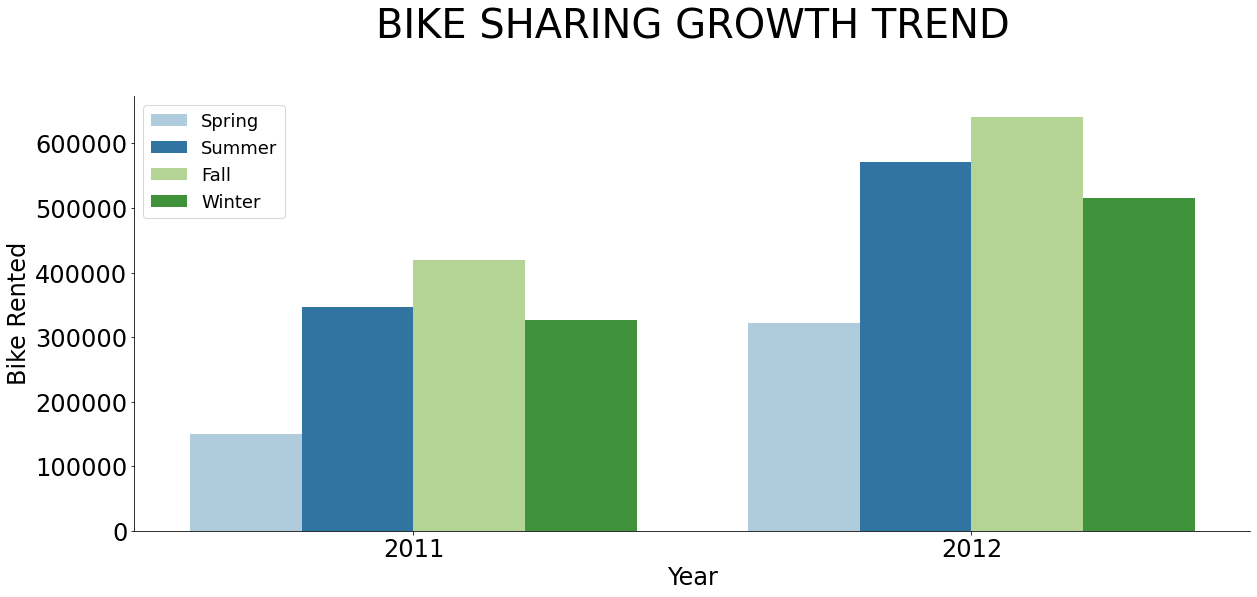

In [31]:
fig, ax = plt.subplots(figsize=(20,8))                                                     # create figure with size (8,6)

sns.barplot(data = bike_season, x='year',y='count',hue='season',ci=None,palette='Paired')  # create barplot 
sns.despine(top=True, right=True, left=False, bottom=False)                                # remove border
plt.legend(title='Season', loc='best', frameon=False)                                      # add legend labels
plt.xlabel('Year',size=24)                                                                         # axis lablel 
plt.ylabel('Bike Rented',size=24)
plt.xticks(size=24)                                                                         # rotating the x label by 45 degree
plt.yticks(size=24)
plt.title('BIKE SHARING GROWTH TREND', size=40, y=1.12)                                     # add the title, title size, and the distance between title and plot
plt.legend(loc=0, prop={'size': 18})

plt.show()

In [32]:
fall = bike[(bike['season']=='Fall') & (bike['year']==2012)].groupby(['season','month','day']).sum()[['casual','registered','count']]
fall = pd.DataFrame(fall).reset_index()
fall

,season,month,day,casual,registered,count
0,Fall,August,1,1074,6506,7580
1,Fall,August,2,983,6278,7261
2,Fall,August,3,1328,5847,7175
3,Fall,August,4,2345,4479,6824
4,Fall,August,5,1707,3757,5464
...,...,...,...,...,...,...
89,Fall,September,18,371,3702,4073
90,Fall,September,19,788,6803,7591
91,Fall,September,20,939,6781,7720
92,Fall,September,21,1250,6917,8167


In [33]:
order_month = pd.CategoricalDtype(
    ['June', 'July', 'August', 'September'], 
    ordered=True
)

In [34]:
fall['month']=fall['month'].astype(order_month)
fall = fall.sort_values(['month','day'])
fall

,season,month,day,casual,registered,count
62,Fall,June,21,778,5127,5905
63,Fall,June,22,964,4859,5823
64,Fall,June,23,2657,4801,7458
65,Fall,June,24,2551,4340,6891
66,Fall,June,25,1139,5640,6779
...,...,...,...,...,...,...
89,Fall,September,18,371,3702,4073
90,Fall,September,19,788,6803,7591
91,Fall,September,20,939,6781,7720
92,Fall,September,21,1250,6917,8167


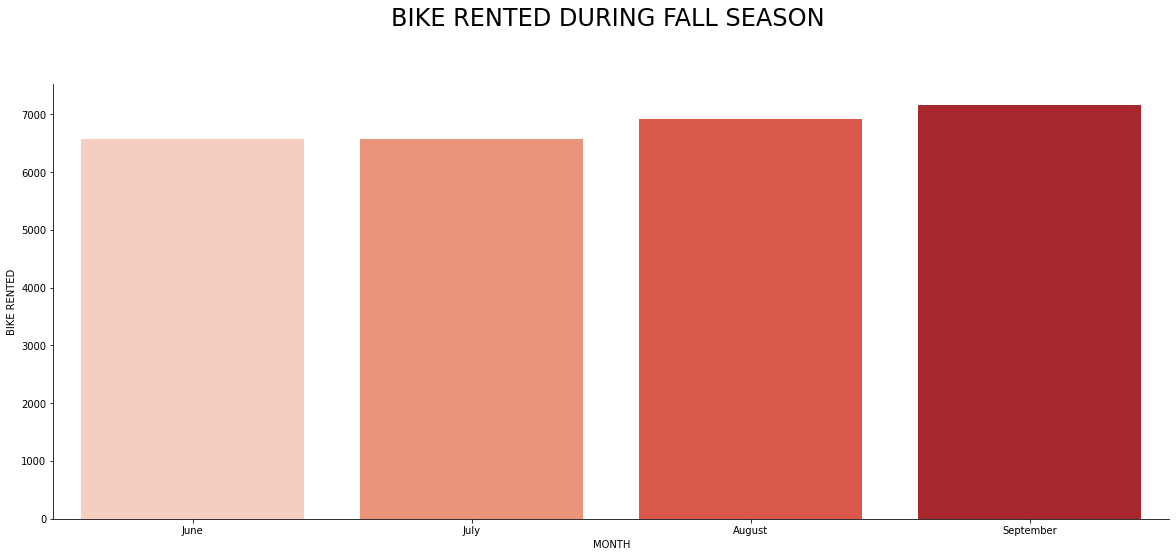

In [35]:
fig, ax = plt.subplots(figsize=(20,8))                                          # create figure with size (8,6)

sns.barplot(data = fall, x='month',y='count',ci=None,palette='Reds')            # create plot 
sns.despine(top=True, right=True, left=False, bottom=False)                     # remove border
plt.xlabel('MONTH')                                                             # axis label
plt.ylabel('BIKE RENTED')
plt.title('BIKE RENTED DURING FALL SEASON ', size=24, y=1.12)                   # add the title, title size, and the distance between title and plot

plt.show()

In [36]:
fall_2012 = bike[(bike['season']=='Fall') & (bike['year']==2012)]
fall_2012

,dteday,season,year,month,hr,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,day,date
12763,2012-06-21,Fall,2012,June,0,No,Thursday,Yes,Clear,30.34,34.850,70.0,6.0032,16,53,69,21,21
12764,2012-06-21,Fall,2012,June,1,No,Thursday,Yes,Clear,29.52,34.850,79.0,8.9981,2,16,18,21,21
12765,2012-06-21,Fall,2012,June,2,No,Thursday,Yes,Clear,29.52,34.850,79.0,7.0015,11,7,18,21,21
12766,2012-06-21,Fall,2012,June,3,No,Thursday,Yes,Clear,29.52,34.850,74.0,0.0000,3,8,11,21,21
12767,2012-06-21,Fall,2012,June,4,No,Thursday,Yes,Clear,28.70,33.335,84.0,6.0032,1,11,12,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15014,2012-09-22,Fall,2012,September,19,No,Saturday,No,Clear,28.70,32.575,58.0,12.9980,99,308,407,22,22
15015,2012-09-22,Fall,2012,September,20,No,Saturday,No,Clear,28.70,32.575,54.0,16.9979,76,249,325,22,22
15016,2012-09-22,Fall,2012,September,21,No,Saturday,No,Clear,26.24,31.060,57.0,16.9979,59,202,261,22,22
15017,2012-09-22,Fall,2012,September,22,No,Saturday,No,Clear,25.42,31.060,57.0,12.9980,59,180,239,22,22


In [37]:
fall_day = pd.DataFrame(fall_2012.groupby(['weekday']).sum()[['casual','registered','count']]).reset_index()
fall_day

,weekday,casual,registered,count
0,Friday,16984,79503,96487
1,Monday,14864,73383,88247
2,Saturday,30242,62122,92364
3,Sunday,25721,54593,80314
4,Thursday,14716,84564,99280
5,Tuesday,12842,75951,88793
6,Wednesday,15272,80722,95994


In [38]:
order_weekday = pd.CategoricalDtype(
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday'], 
    ordered=True
)

In [39]:
fall_day['weekday']=fall_day['weekday'].astype(order_weekday)
fall_day = fall_day.sort_values('weekday')
fall_day

,weekday,casual,registered,count
3,Sunday,25721,54593,80314
1,Monday,14864,73383,88247
5,Tuesday,12842,75951,88793
6,Wednesday,15272,80722,95994
4,Thursday,14716,84564,99280
0,Friday,16984,79503,96487
2,Saturday,30242,62122,92364


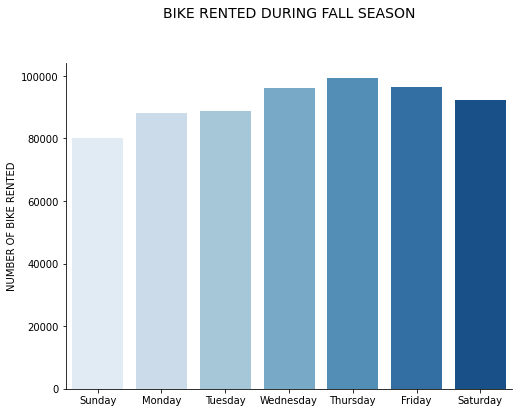

In [40]:
fig, ax = plt.subplots(figsize=(8,6))                                           # create figure with size (20,6)

sns.barplot(data = fall_day, x='weekday',y='count',ci=None, palette='Blues')    # create plot 
sns.despine(top=True, right=True, left=False, bottom=False)                     # remove border
plt.xlabel('')                                                                  # axis lablel 
plt.ylabel('NUMBER OF BIKE RENTED')
plt.title('BIKE RENTED DURING FALL SEASON', size=14, y=1.12)                    # add the title, title size, and the distance between title and plot

plt.show()

By separating for each season, we can see from the graph that people tend to use bike in Fall Season (it appears that every fall is the highest number of bike rented each year). And by that, we breakdown more into Fall 2012. And we found that September is the month where the bike number at its peak. Followed with the occasion that on Thursday people use bike more eventhough the distribution for days are about the same.

### **NATURAL CONDITION VARIABLES**

In [41]:
natcon = bike.groupby(['season','month','day']).mean()[['temp','atemp','humidity','windspeed']].reset_index()
natcon['month']=natcon['month'].astype(order_month)
natcon = natcon.sort_values(['month','day'])
natcon

,season,month,day,temp,atemp,humidity,windspeed
215,Summer,June,1,29.075833,33.223229,71.625000,14.895915
216,Summer,June,2,26.615833,30.255729,42.708333,16.041475
217,Summer,June,3,25.061250,29.056667,42.375000,14.646479
218,Summer,June,4,25.266250,29.324479,47.166667,13.667162
219,Summer,June,5,24.377917,28.567396,63.291667,11.666933
...,...,...,...,...,...,...,...
104,Spring,NaN,31,12.829583,15.940208,59.666667,12.562500
164,Spring,NaN,31,11.702083,14.189167,51.020833,15.041779
245,Summer,NaN,31,14.196250,16.982083,82.833333,15.686794
276,Summer,NaN,31,29.827500,33.917812,56.479167,10.271379


In [42]:
fall_temp = pd.DataFrame(bike[(bike['season']=='Fall') & (bike['year']==2012)].groupby(['season','month','day']).mean()[['temp','atemp','humidity','windspeed']]).reset_index()
fall_temp['month']=fall_temp['month'].astype(order_month)
fall_temp = fall_temp.sort_values(['month','day'])
fall_temp

,season,month,day,temp,atemp,humidity,windspeed
62,Fall,June,21,33.039167,37.627083,56.791667,7.958762
63,Fall,June,22,31.877500,36.206042,57.375000,12.250392
64,Fall,June,23,29.998333,32.639583,53.458333,12.041296
65,Fall,June,24,30.476667,33.712708,47.916667,9.750175
66,Fall,June,25,29.349167,32.702083,50.416667,20.125683
...,...,...,...,...,...,...,...
89,Fall,September,18,25.556667,28.253333,87.250000,23.958363
90,Fall,September,19,22.652500,27.020208,53.666667,14.416725
91,Fall,September,20,22.413333,26.609583,61.833333,7.917167
92,Fall,September,21,24.565833,28.598542,66.875000,10.333354


### **TEMPERATURE**

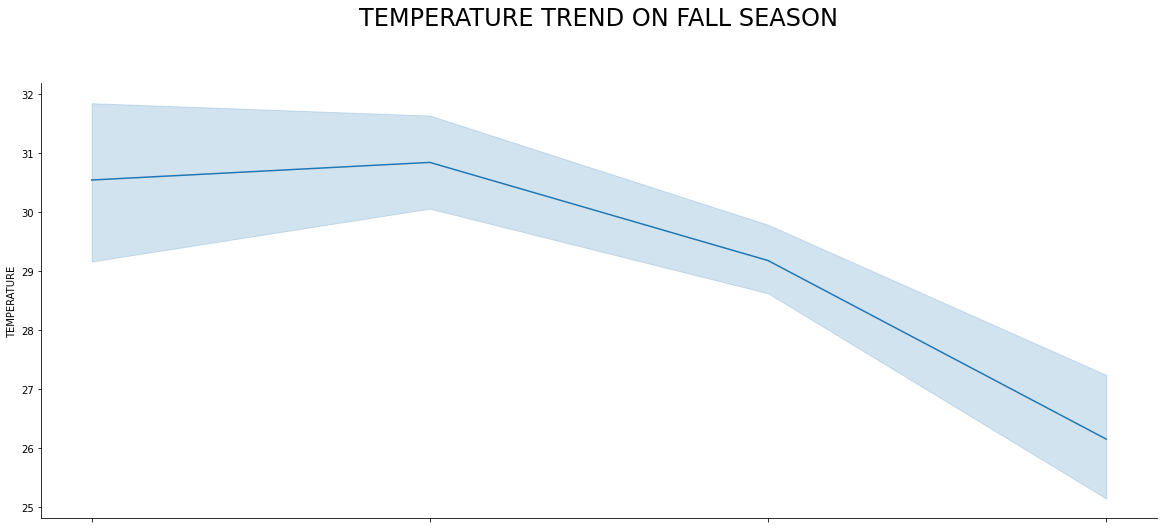

In [43]:
fig, ax = plt.subplots(figsize=(20,8))                                                          # create figure with size (20,8)

sns.lineplot(data = fall_temp, x='month',y='temp')                                              # create plot 
sns.despine(top=True, right=True, left=False, bottom=False)                                     # remove border
plt.xlabel('')                                                                                  # axis label
plt.ylabel('TEMPERATURE')
plt.title('TEMPERATURE TREND ON FALL SEASON', size=24, y=1.12)                                  # add the title, title size, and the distance between title and plot
ax.set_xticklabels('')                                                                          # removing xticklabels

plt.show()

### **HUMIDITY**

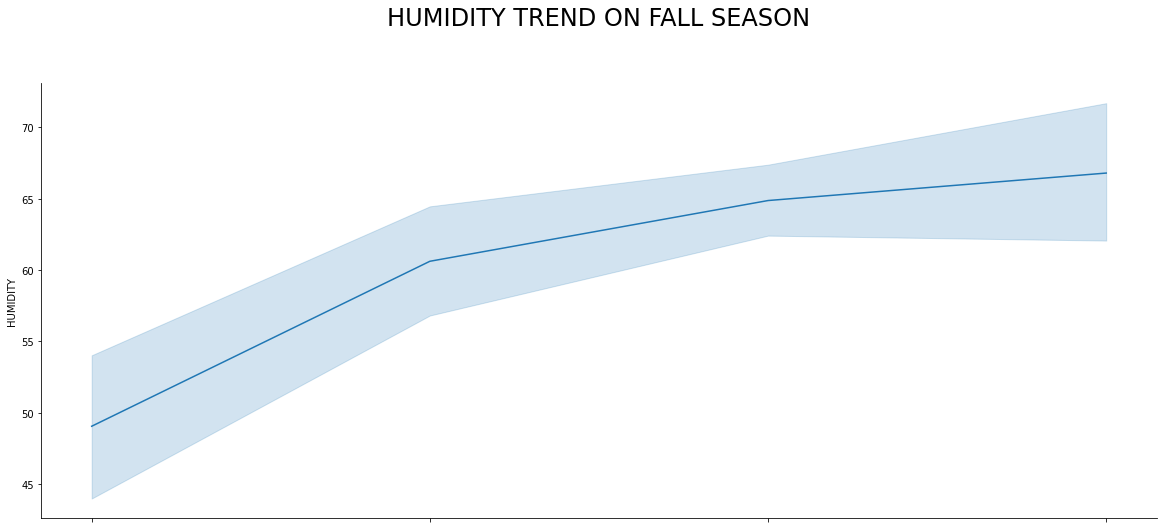

In [44]:
fig, ax = plt.subplots(figsize=(20,8))                                                     # create figure with size (20,8)

sns.lineplot(data = fall_temp, x='month',y='humidity')                                     # create plot 
sns.despine(top=True, right=True, left=False, bottom=False)                                # remove border
plt.xlabel('')                                                                        # axis label
plt.ylabel('HUMIDITY')
plt.title('HUMIDITY TREND ON FALL SEASON', size=24, y=1.12)                                # add the title, title size, and the distance between title and plot
ax.set_xticklabels('')                                                                     # removing xticklabels

plt.show()

### **WINDSPEED**

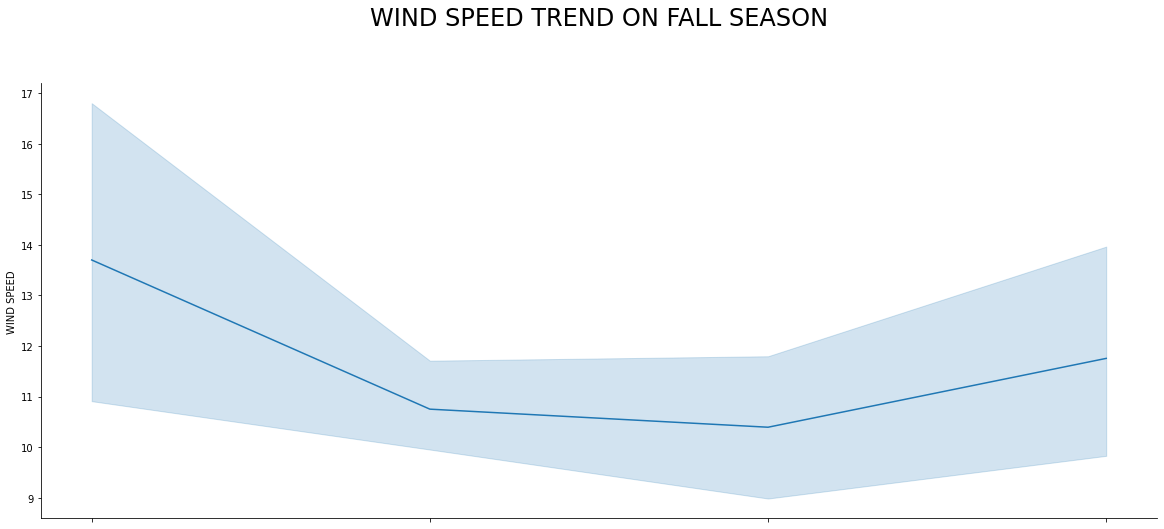

In [45]:
fig, ax = plt.subplots(figsize=(20,8))                                                          # create figure with size (20,8)

sns.lineplot(data = fall_temp, x='month', y='windspeed')             # create plot 
sns.despine(top=True, right=True, left=False, bottom=False)                                     # remove border
plt.xlabel('')                                                                                  # axis label
plt.ylabel('WIND SPEED')
plt.title('WIND SPEED TREND ON FALL SEASON', size=24, y=1.12)                                   # add the title, title size, and the distance between title and plot
ax.set_xticklabels('')                                                                          # removing xticklabels

plt.show()

The three graphs above shows the trend of temperature, humidity and windspeed in fall season. For temperature, in fall season range from 22 - 37. Which appear decreasing or become more cold as we go into September. The humidity increase as we go into September. The windspeed is decreasing until August and began to increase sligthly in September.

### **EFFECT OF TEMPERATURE AND WEATHER CONDITION ON BIKE RENTED**

In [46]:
bike_weather = pd.DataFrame(bike.groupby(['hr','year','weekday','day','month','weather_condition']).sum()[['casual','registered','count']]).reset_index()
bike_weather

,hr,year,weekday,day,month,weather_condition,casual,registered,count
0,0,2011,Friday,1,April,Light Rain,0,6,6
1,0,2011,Friday,1,July,Clear,20,48,68
2,0,2011,Friday,2,December,Clear,6,32,38
3,0,2011,Friday,2,September,Clear,6,58,64
4,0,2011,Friday,3,June,Clear,15,53,68
...,...,...,...,...,...,...,...,...,...
17374,23,2012,Wednesday,28,November,Clear,5,73,78
17375,23,2012,Wednesday,29,August,Clear,34,123,157
17376,23,2012,Wednesday,29,February,Light Rain,3,30,33
17377,23,2012,Wednesday,30,May,Clear,39,121,160


In [47]:
bike_weather2 = bike.groupby(['hr','year','weekday','day','month','weather_condition']).mean()[['temp']]
bike_weather2 = pd.DataFrame(bike_weather2).reset_index()
bike_weather2

,hr,year,weekday,day,month,weather_condition,temp
0,0,2011,Friday,1,April,Light Rain,10.66
1,0,2011,Friday,1,July,Clear,27.06
2,0,2011,Friday,2,December,Clear,10.66
3,0,2011,Friday,2,September,Clear,26.24
4,0,2011,Friday,3,June,Clear,25.42
...,...,...,...,...,...,...,...
17374,23,2012,Wednesday,28,November,Clear,10.66
17375,23,2012,Wednesday,29,August,Clear,27.06
17376,23,2012,Wednesday,29,February,Light Rain,17.22
17377,23,2012,Wednesday,30,May,Clear,27.06


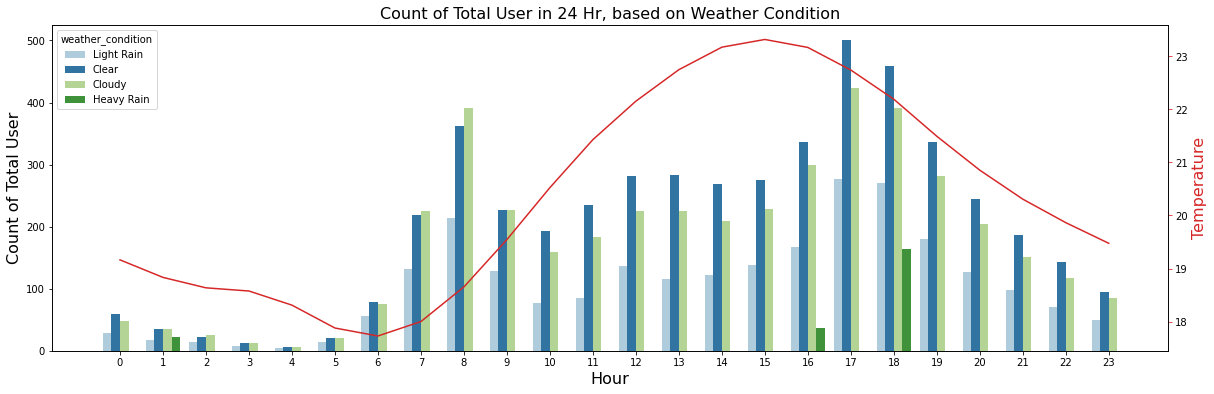

In [48]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(20,6))
color = 'tab:green'
#bar plot creation
ax1 = sns.barplot(x='hr', y='count',hue='weather_condition', data = bike_weather, palette='Paired',ci=None)
ax1.set_title('Count of Total User in 24 Hr, based on Weather Condition', fontsize=16)
ax1.set_xlabel('Hour', fontsize=16)
ax1.set_ylabel('Count of Total User', fontsize=16)

ax1.tick_params(axis='y')
#specify we want to share the same x-axis

ax2 = ax1.twinx()
color = 'tab:red'
ax2 = sns.lineplot(x='hr', y='temp', data = bike_weather2, sort=False, color=color,ci=None)
#line plot creation
ax2.set_ylabel('Temperature', fontsize=16,color=color)

ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

This graph shows us that most of people will rent bike during clear condition defiying the how many temperature outside will be. They follow on hourly behaviour.

###**USER TYPE**


In [49]:
user = bike.groupby(['month','year']).sum()[['casual','registered','count']].sort_values('month')
user = pd.DataFrame(user).reset_index()
user['month']=user['month'].astype(order_mth)
user = user.sort_values('month')
user

,month,year,casual,registered,count
8,January,2011,3073,35116,38189
9,January,2012,8969,87775,96744
6,February,2011,6242,41973,48215
7,February,2012,8721,94416,103137
15,March,2012,31618,133257,164875
14,March,2011,12826,51219,64045
0,April,2011,22346,72524,94870
1,April,2012,38456,135768,174224
17,May,2012,44235,151630,195865
16,May,2011,31050,104771,135821


### **CASUAL USER**

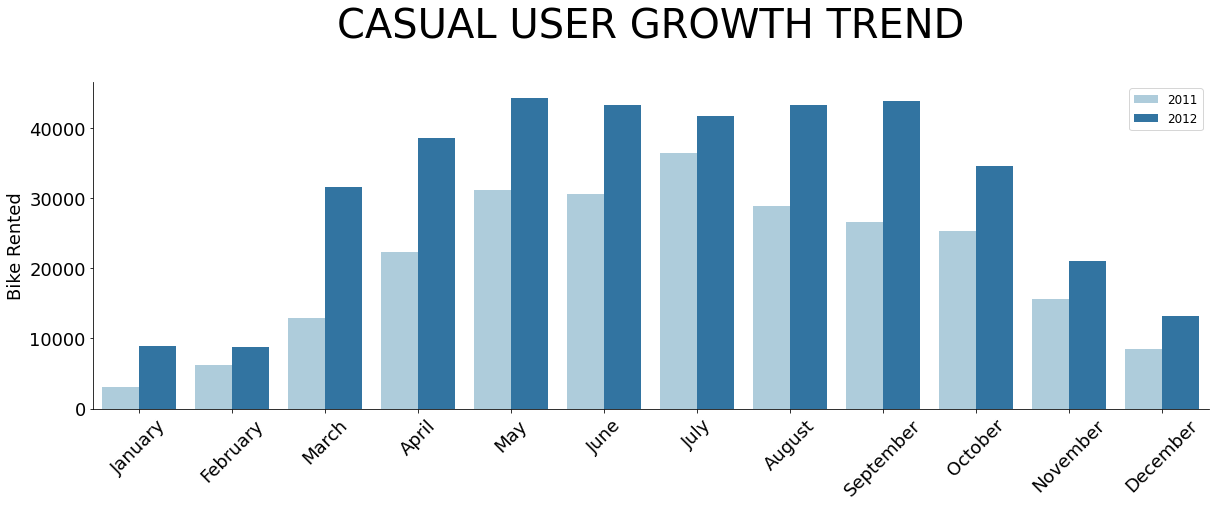

In [50]:
fig, ax = plt.subplots(figsize=(20,6))                                                  # create figure with size (20,6)

sns.barplot(data = user, x='month',y='casual',hue='year',ci=None,palette='Paired')      # createplot 
sns.despine(top=True, right=True, left=False, bottom=False)                             # remove border
plt.legend(title='Year', loc='best', frameon=False)                                     # add legend labels

plt.xlabel('')                                                                          # axis lablel 
plt.ylabel('Bike Rented', size=18)
plt.xticks(rotation=45, size=18)                                                                         # rotating the x label by 45 degree
plt.yticks(size=18)
plt.legend(loc=0, prop={'size': 12})

plt.title('CASUAL USER GROWTH TREND', size=40, y=1.12)                                               # add the title, title size, and the distance between title and plot

plt.show()

### **REGISTERED USER**

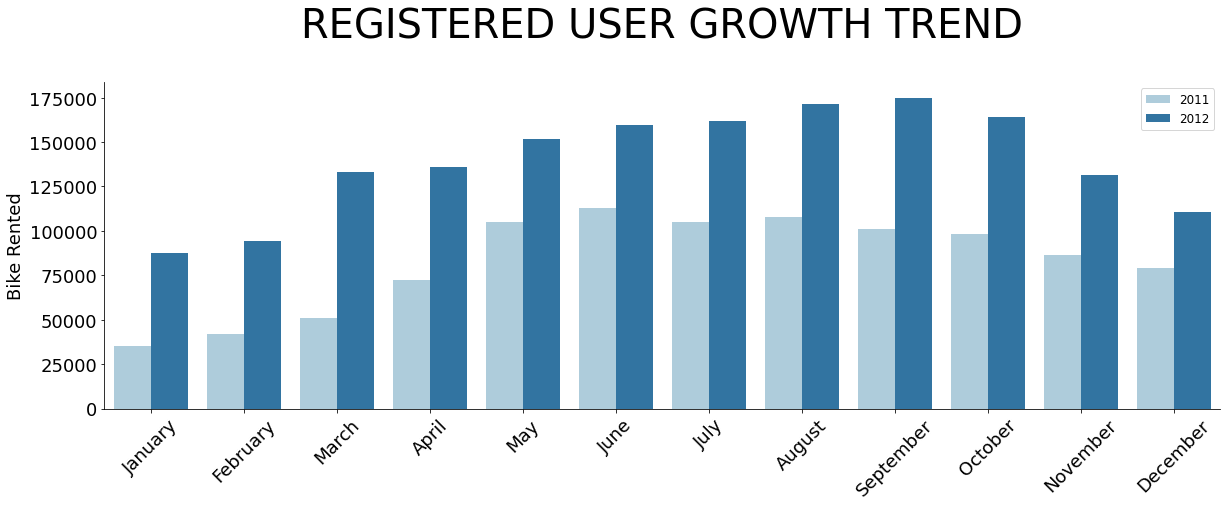

In [51]:
fig, ax = plt.subplots(figsize=(20,6))                                                  # create figure with size (20,6)

sns.barplot(data = user, x='month',y='registered',hue='year',ci=None,palette='Paired')  # createplot 
sns.despine(top=True, right=True, left=False, bottom=False)                             # remove border
plt.legend(title='Year', loc='best', frameon=False)                                     # add legend labels

plt.xlabel('')                                                                          # axis lablel 
plt.ylabel('Bike Rented', size=18)
plt.xticks(rotation=45, size=18)                                                                         # rotating the x label by 45 degree
plt.yticks(size=18)
plt.legend(loc=0, prop={'size': 12})

plt.title('REGISTERED USER GROWTH TREND', size=40, y=1.12)                                          # add the title, title size, and the distance between title and plot

plt.show()

The user of rented bike increase from 2011 to 2012. For casual user they begin to increase significantly in March, and they go steady until September. Casual user prefer bike rent lessly during winter season which is start at October until December. In another case, the registered user shows increase steadily over the year with the top at September.

### **USER BEHAVIOUR**

### **CASUAL USER**

In [52]:
bike_hour = bike.groupby(['hr','month','year','weekday','is_holiday']).sum()[['casual','registered','count']].sort_values('hr')
bike_hour = pd.DataFrame(bike_hour).reset_index()
bike_hour

,hr,month,year,weekday,is_holiday,casual,registered,count
0,0,April,2011,Friday,No,18,94,112
1,0,March,2012,Tuesday,No,11,62,73
2,0,March,2012,Wednesday,No,13,104,117
3,0,May,2011,Friday,No,48,177,225
4,0,May,2011,Monday,No,139,170,309
...,...,...,...,...,...,...,...,...
4502,23,January,2011,Monday,Yes,1,3,4
4503,23,January,2011,Saturday,No,25,146,171
4504,23,January,2011,Sunday,No,9,65,74
4505,23,February,2012,Saturday,No,23,232,255


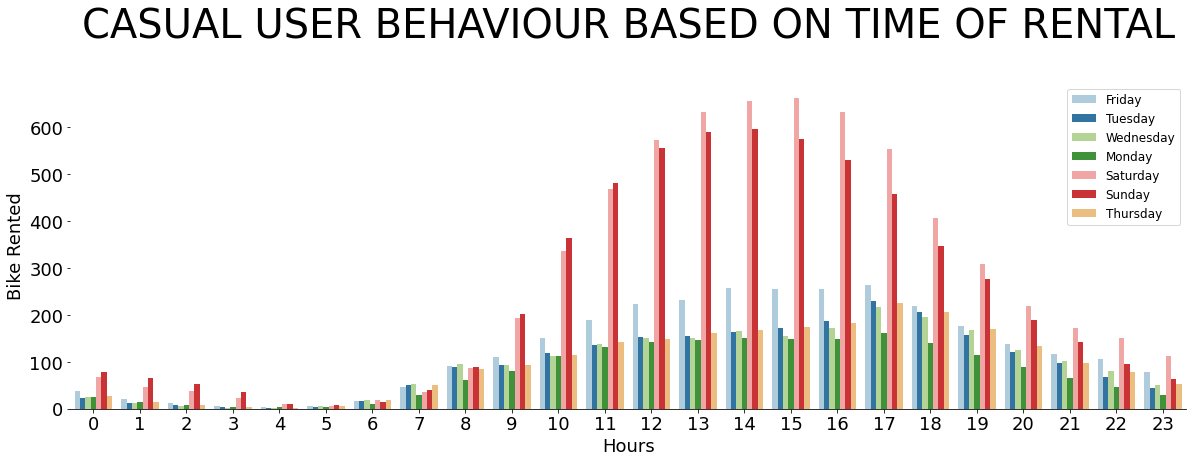

In [53]:
fig, ax = plt.subplots(figsize=(20,6))                                                  # create figure with size (20,6)

sns.barplot(data = bike_hour, x='hr',y='casual',hue='weekday',ci=None,palette='Paired') # createplot 
sns.despine(top=True, right=True, left=True, bottom=False)                             # remove border
plt.legend(title='Day', loc='best', frameon=False)                                      # add legend labels

plt.xlabel('Hours',size=18)                                                                     # axis lablel 
plt.ylabel('Bike Rented', size=18)
plt.xticks(size=18)                                                                         # rotating the x label by 45 degree
plt.yticks(size=18)
plt.legend(loc=0, prop={'size': 12})

plt.title('CASUAL USER BEHAVIOUR BASED ON TIME OF RENTAL', size=40, y=1.12)           # add the title, title size, and the distance between title and plot

plt.show()

### **REGISTERED USER**

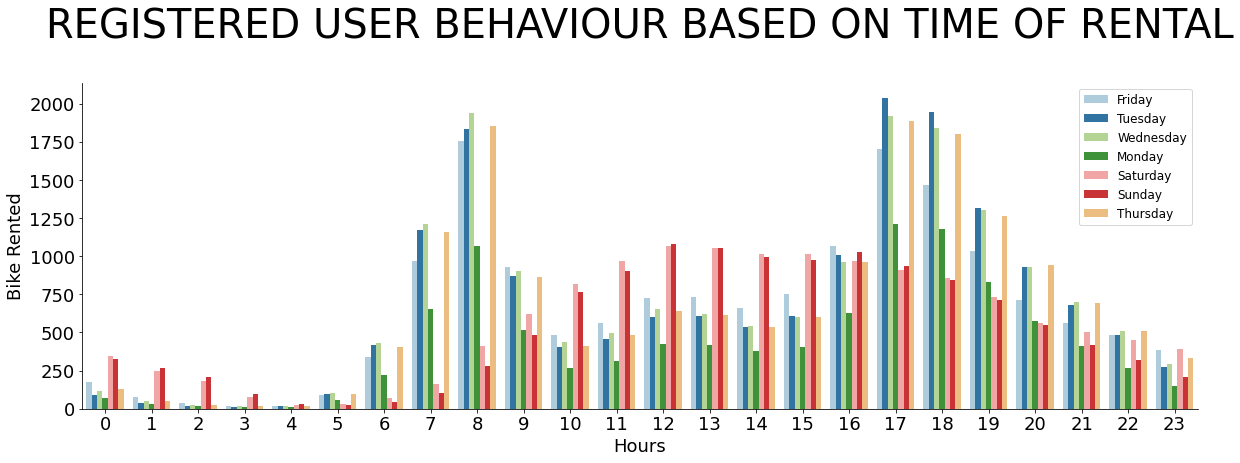

In [54]:
fig, ax = plt.subplots(figsize=(20,6))                                                      # create figure with size (20,6)

sns.barplot(data = bike_hour, x='hr',y='registered',hue='weekday',ci=None,palette='Paired') # createplot 
sns.despine(top=True, right=True, left=False, bottom=False)                                 # remove border
plt.legend(title='Day', loc='best', frameon=False)                                          # add legend labels

plt.xlabel('Hours',size=18)                                                                     # axis lablel 
plt.ylabel('Bike Rented', size=18)
plt.xticks(size=18)                                                                         # rotating the x label by 45 degree
plt.yticks(size=18)
plt.legend(loc=0, prop={'size': 12})

plt.title('REGISTERED USER BEHAVIOUR BASED ON TIME OF RENTAL', size=40, y=1.12)            # add the title, title size, and the distance between title and plot

plt.show()

From graph above, we can conclude that the usage of rent bike by casual user are mostly during weekend. It shows that on the weekday the usage are pretty low, but it goes highly up on weekend during 9 to 20. Meanwhile, the usage of rent bike by registered user are commonly for commuting during weekdays, which can be seen from the graph the number start increasing during the commute hour. This pattern is repeating for every weekday (with near count value).

### **HOLIDAY**

In [55]:
holiday_effect = pd.DataFrame(bike.groupby(['month','is_holiday','weekday']).sum()[['casual','registered','count']]).reset_index()
holiday_effect['month']=holiday_effect['month'].astype(order_mth)
holiday_effect['weekday']=holiday_effect['weekday'].astype(order_weekday)
holiday_effect = holiday_effect.sort_values(['month','weekday'])
holiday_effect

,month,is_holiday,weekday,casual,registered,count
36,January,No,Sunday,3049,15110,18159
34,January,No,Monday,666,13353,14019
40,January,Yes,Monday,578,4671,5249
38,January,No,Tuesday,1498,21612,23110
39,January,No,Wednesday,982,16127,17109
...,...,...,...,...,...,...
24,December,Yes,Tuesday,440,573,1013
22,December,No,Wednesday,1573,24590,26163
20,December,No,Thursday,2320,31078,33398
16,December,No,Friday,3004,30678,33682


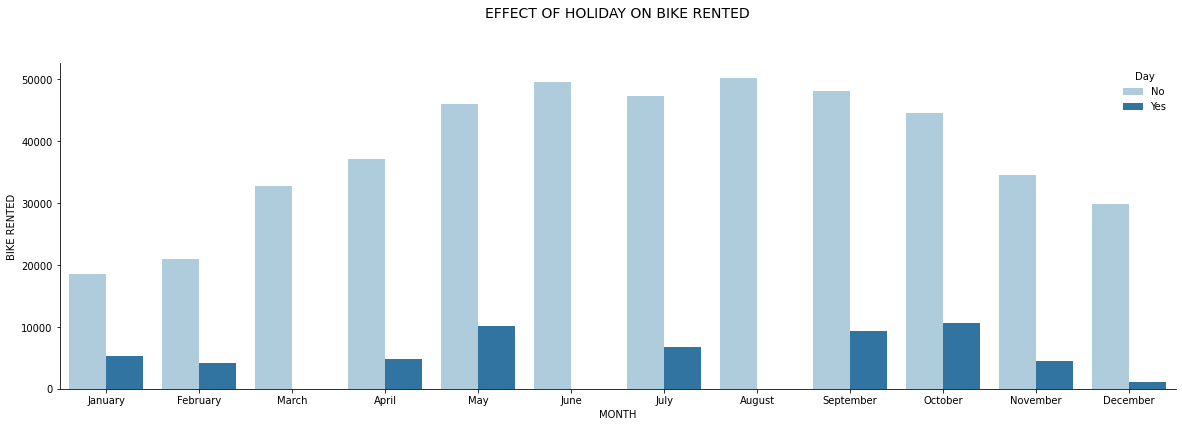

In [56]:
fig, ax = plt.subplots(figsize=(20,6))                                                             # create figure with size (8,6)

sns.barplot(data = holiday_effect, x='month',y='count',hue='is_holiday',ci=None,palette='Paired')  # createplot 
sns.despine(top=True, right=True, left=False, bottom=False)                                        # remove border
plt.legend(title='Day', loc='best', frameon=False)                                                 # add legend labels
plt.xlabel('MONTH')                                                                                # axis lablel 
plt.ylabel('BIKE RENTED')
plt.title('EFFECT OF HOLIDAY ON BIKE RENTED', size=14, y=1.12)                                     # add the title, title size, and the distance between title and plot

plt.show()

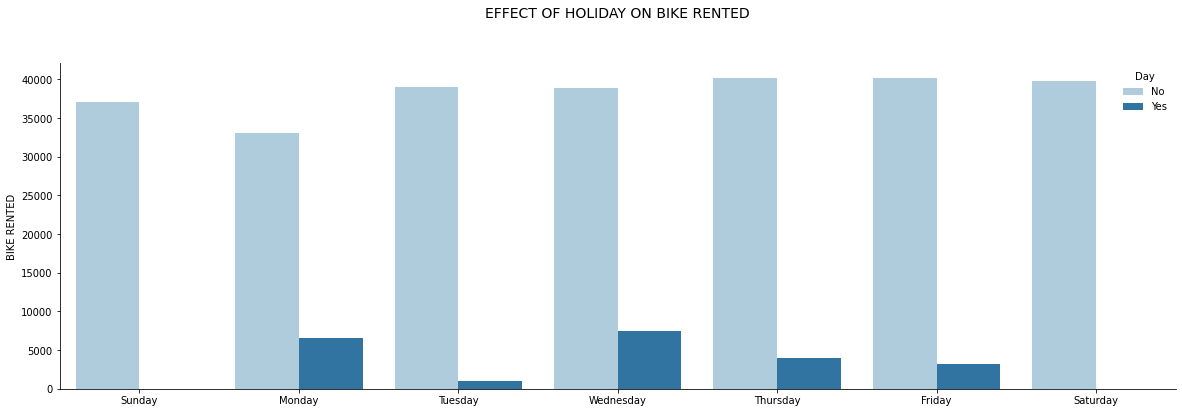

In [57]:
fig, ax = plt.subplots(figsize=(20,6))                                                             # create figure with size (8,6)

sns.barplot(data = holiday_effect, x='weekday',y='count',hue='is_holiday',ci=None,palette='Paired')  # createplot 
sns.despine(top=True, right=True, left=False, bottom=False)                                        # remove border
plt.legend(title='Day', loc='best', frameon=False)                                                 # add legend labels
plt.xlabel('')                                                                                # axis lablel 
plt.ylabel('BIKE RENTED')
plt.title('EFFECT OF HOLIDAY ON BIKE RENTED', size=14, y=1.12)                                     # add the title, title size, and the distance between title and plot

plt.show()

In [58]:
sum_hol = pd.DataFrame(bike.groupby('is_holiday').sum()[['count']]).reset_index()
sum_hol

,is_holiday,count
0,No,3214244
1,Yes,78435


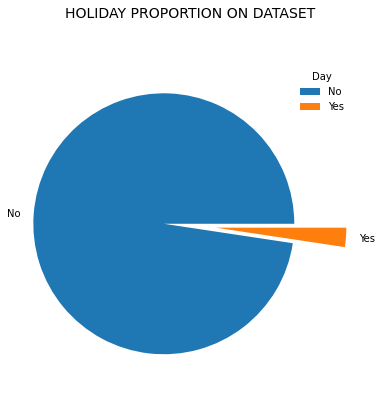

In [59]:
fig, ax = plt.subplots(figsize=(20,6))                                                             # create figure with size (8,6)

plt.pie(data=sum_hol, x='count', labels='is_holiday', explode=[0.2,0.2])                           # createplot 
sns.despine(top=True, right=True, left=False, bottom=False)                                        # remove border
plt.legend(title='Day', loc='best', frameon=False)                                                 # add legend labels
plt.xlabel('')                                                                                     # axis lablel 
plt.title('HOLIDAY PROPORTION ON DATASET', size=14, y=1.12)                                     # add the title, title size, and the distance between title and plot

plt.show()



These graphs show people ride less on holidays. And the number of holiday on 2011 and 2012 are only a few based on data extracted from dchr.dc.gov . Which means that holiday only will make a small effect on number of bike rented.

# **EXPLORE DATASET**

## **DISTRIBUTION DATA OF EACH FEATURES**

### YEAR

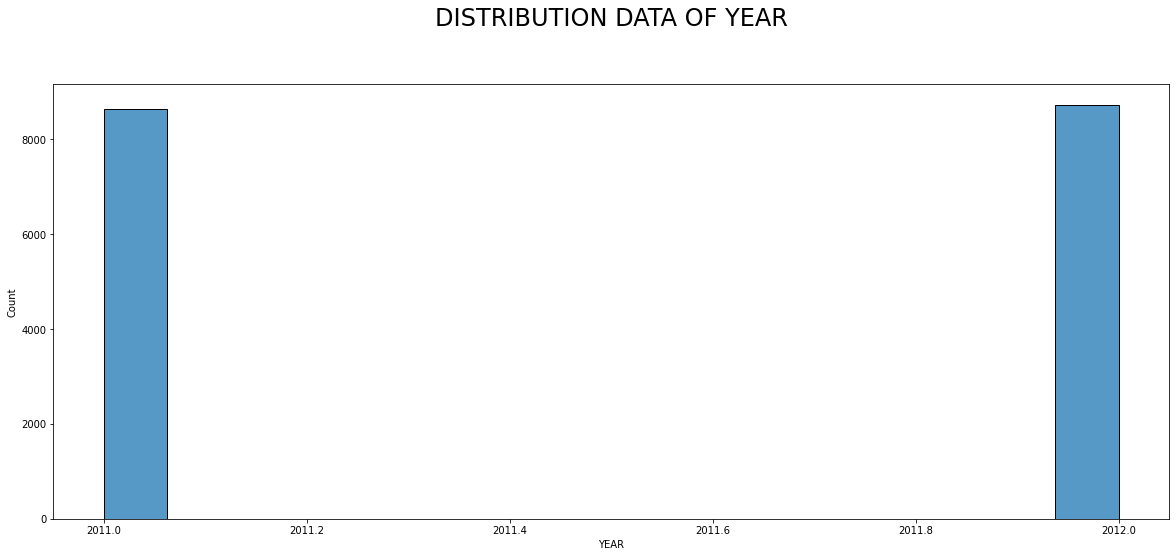

In [60]:
plt.figure(figsize=(20,8))
sns.histplot(bike['year'])
plt.xlabel('YEAR')
plt.title('DISTRIBUTION DATA OF YEAR', size=24, y=1.12)                                          
plt.show()

### MONTH

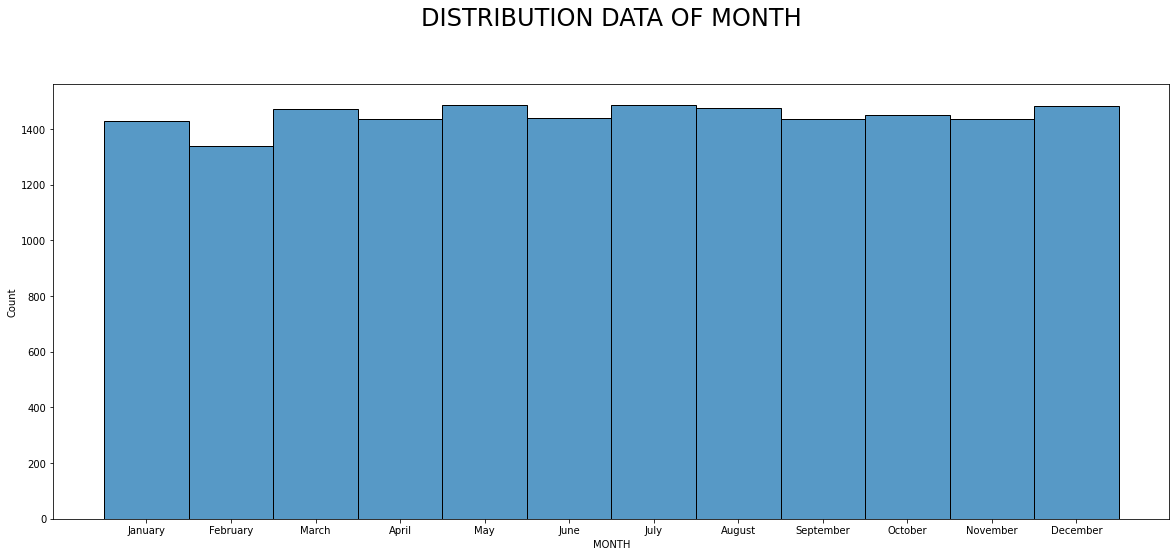

In [61]:
plt.figure(figsize=(20,8))
sns.histplot(bike['month'])
plt.xlabel('MONTH')
plt.title('DISTRIBUTION DATA OF MONTH', size=24, y=1.12)                                          
plt.show()

###SEASON

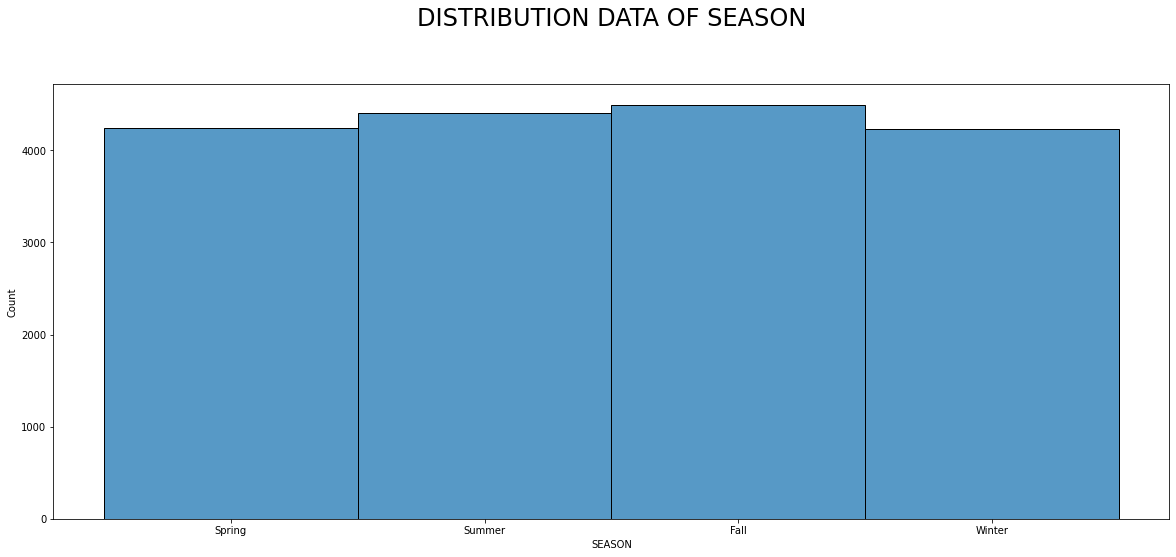

In [62]:
plt.figure(figsize=(20,8))
sns.histplot(bike['season'])
plt.xlabel('SEASON')
plt.title('DISTRIBUTION DATA OF SEASON', size=24, y=1.12)                                          
plt.show()

### WEEKDAY

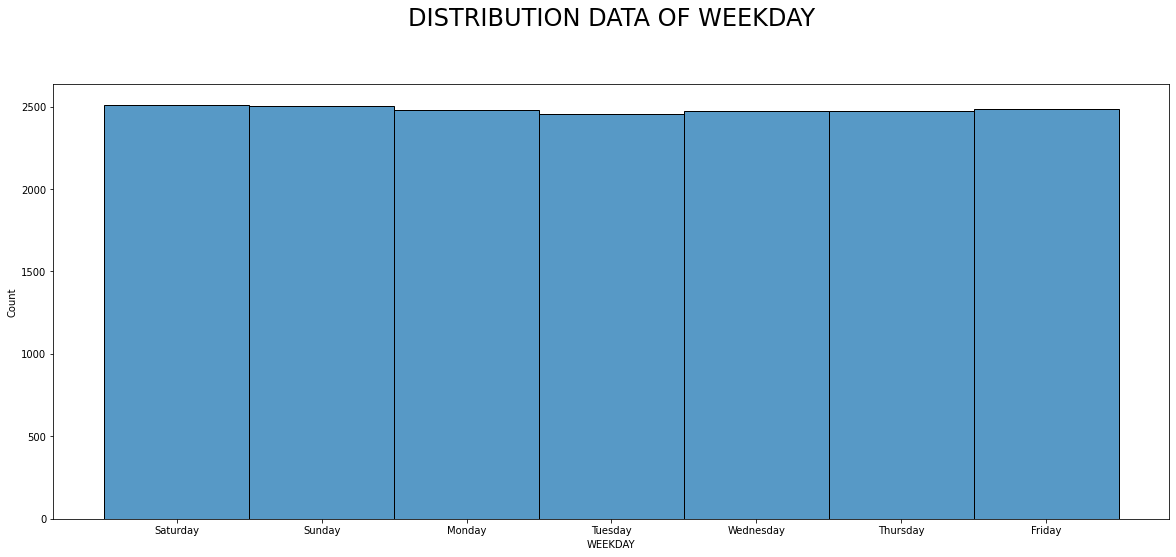

In [63]:
plt.figure(figsize=(20,8))
sns.histplot(bike['weekday'])
plt.xlabel('WEEKDAY')
plt.title('DISTRIBUTION DATA OF WEEKDAY', size=24, y=1.12)                                          
plt.show()

###HOLIDAY

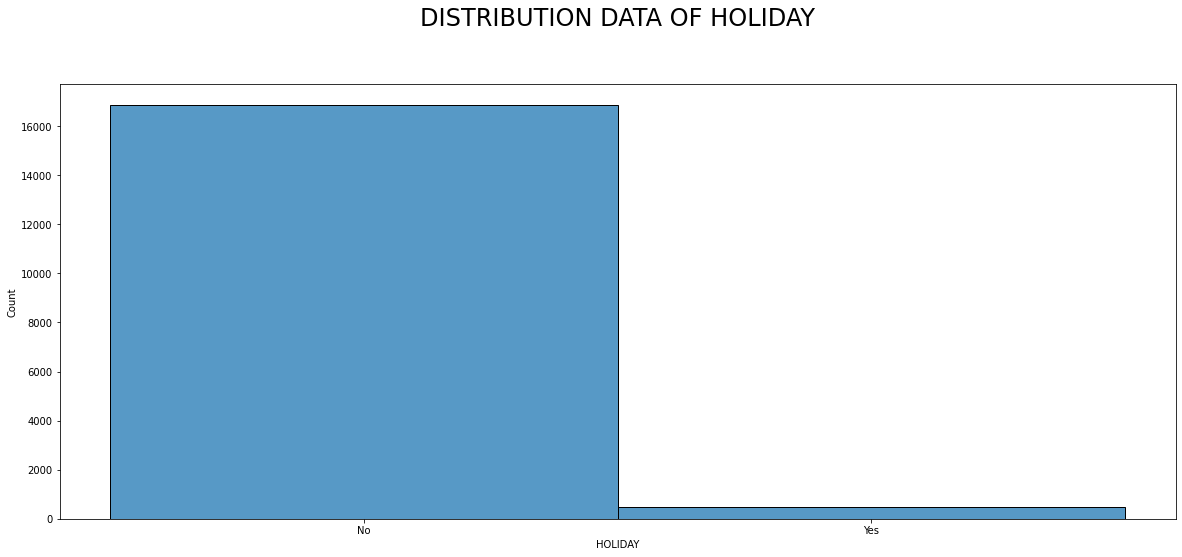

In [64]:
plt.figure(figsize=(20,8))
sns.histplot(bike['is_holiday'])
plt.xlabel('HOLIDAY')
plt.title('DISTRIBUTION DATA OF HOLIDAY', size=24, y=1.12)                                          
plt.show()

###WORKING DAY

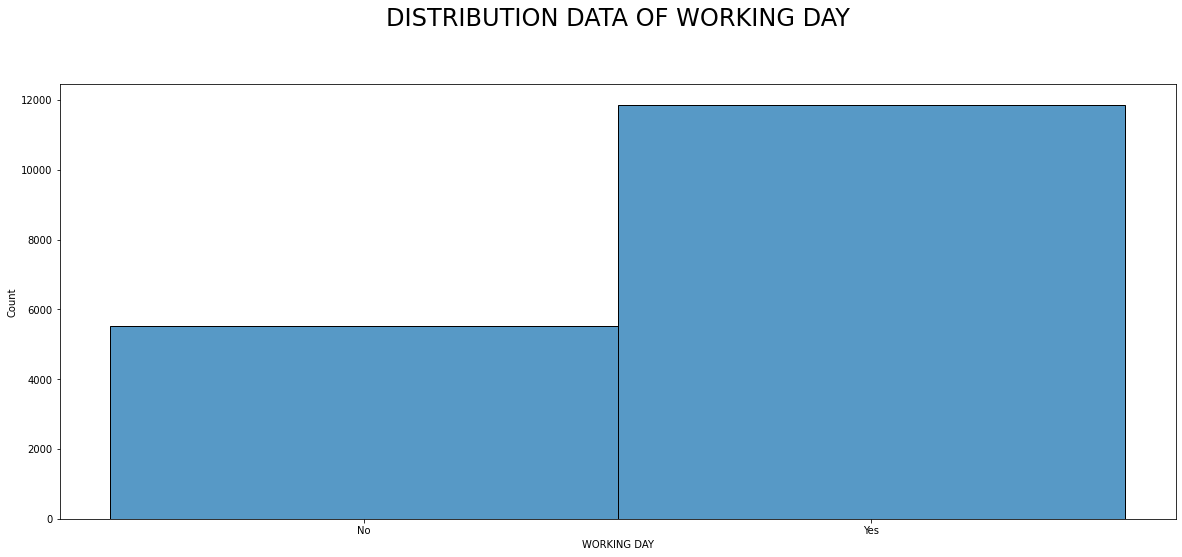

In [65]:
plt.figure(figsize=(20,8))
sns.histplot(bike['is_workingday'])
plt.xlabel('WORKING DAY')
plt.title('DISTRIBUTION DATA OF WORKING DAY', size=24, y=1.12)                                          
plt.show()

### WEATHER CONDITION

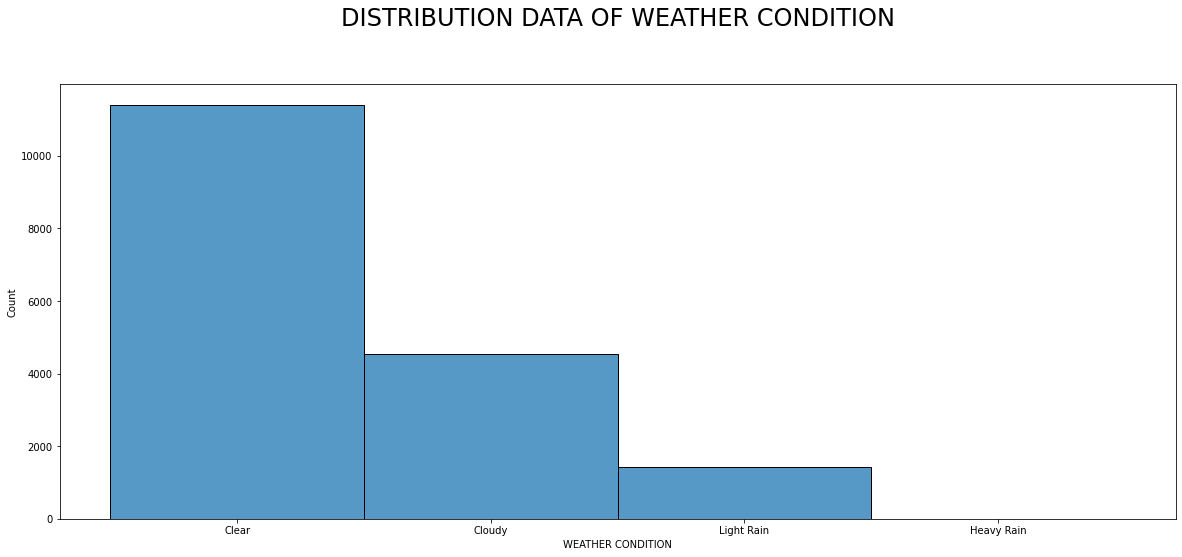

In [66]:
plt.figure(figsize=(20,8))
sns.histplot(bike['weather_condition'])
plt.xlabel('WEATHER CONDITION')
plt.title('DISTRIBUTION DATA OF WEATHER CONDITION', size=24, y=1.12)                                          
plt.show()

###TEMP

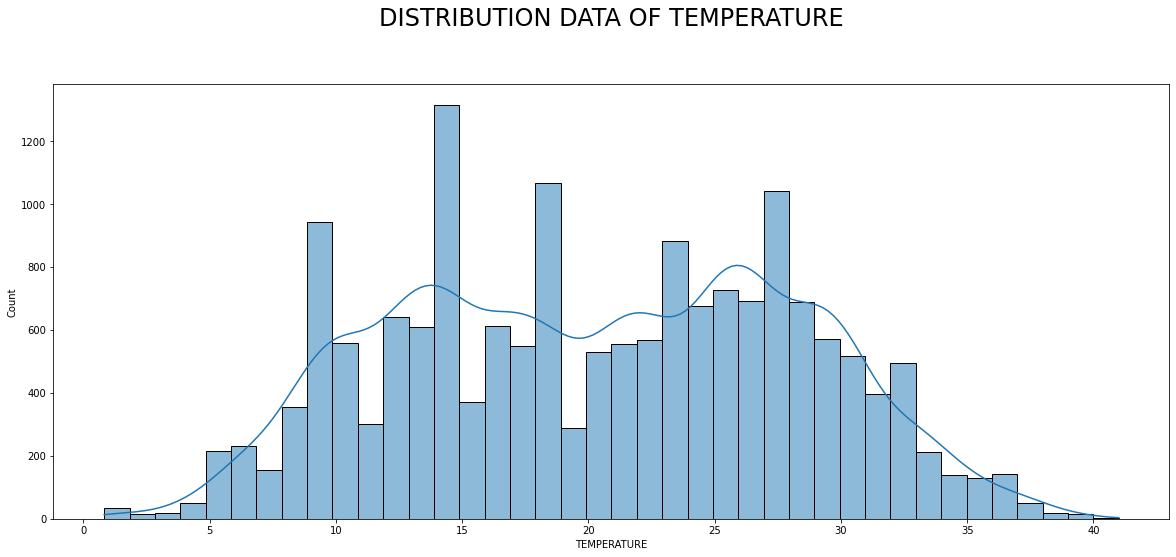

In [67]:
plt.figure(figsize=(20,8))
sns.histplot(bike['temp'], kde=True)
plt.xlabel('TEMPERATURE')
plt.title('DISTRIBUTION DATA OF TEMPERATURE', size=24, y=1.12)                                          
plt.show()

###ATEMP

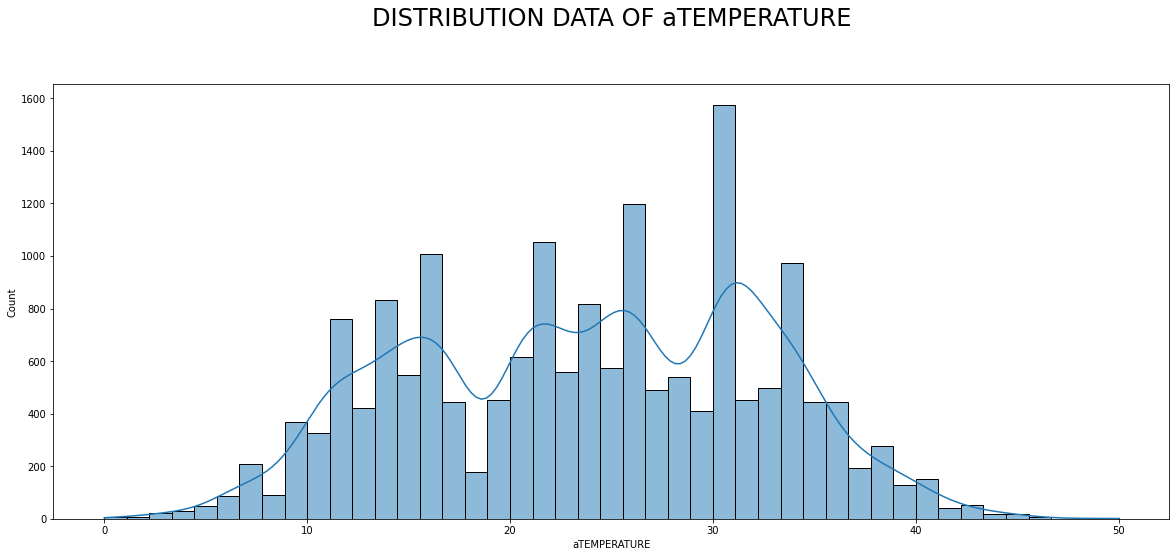

In [68]:
plt.figure(figsize=(20,8))
sns.histplot(bike['atemp'], kde=True)
plt.xlabel('aTEMPERATURE')
plt.title('DISTRIBUTION DATA OF aTEMPERATURE', size=24, y=1.12)                                          
plt.show()

###HUMIDITY

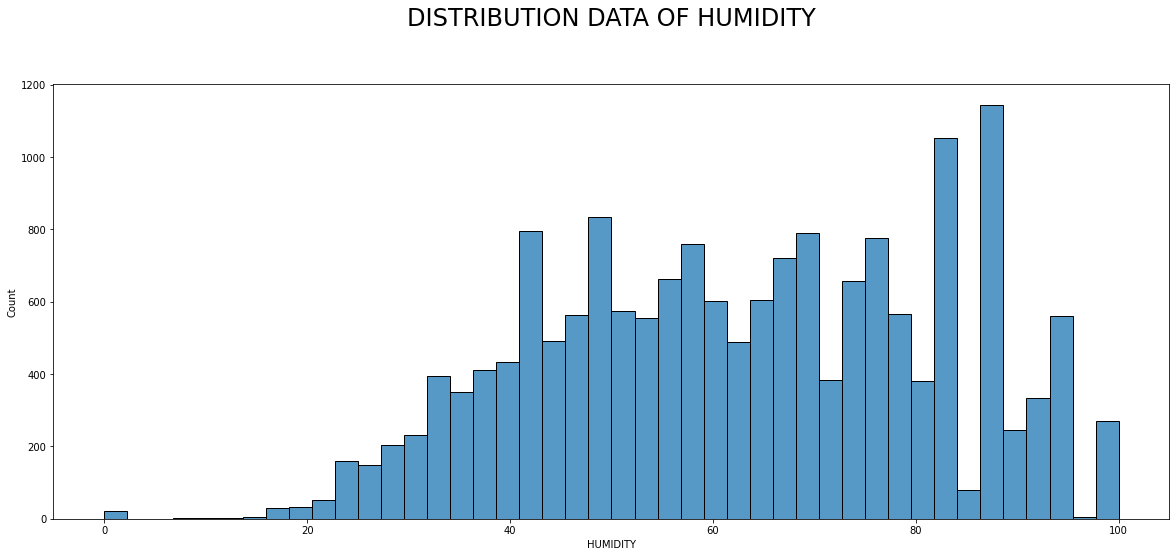

In [69]:
plt.figure(figsize=(20,8))
sns.histplot(bike['humidity'])
plt.xlabel('HUMIDITY')
plt.title('DISTRIBUTION DATA OF HUMIDITY', size=24, y=1.12)                                          
plt.show()

###WINDSPEED

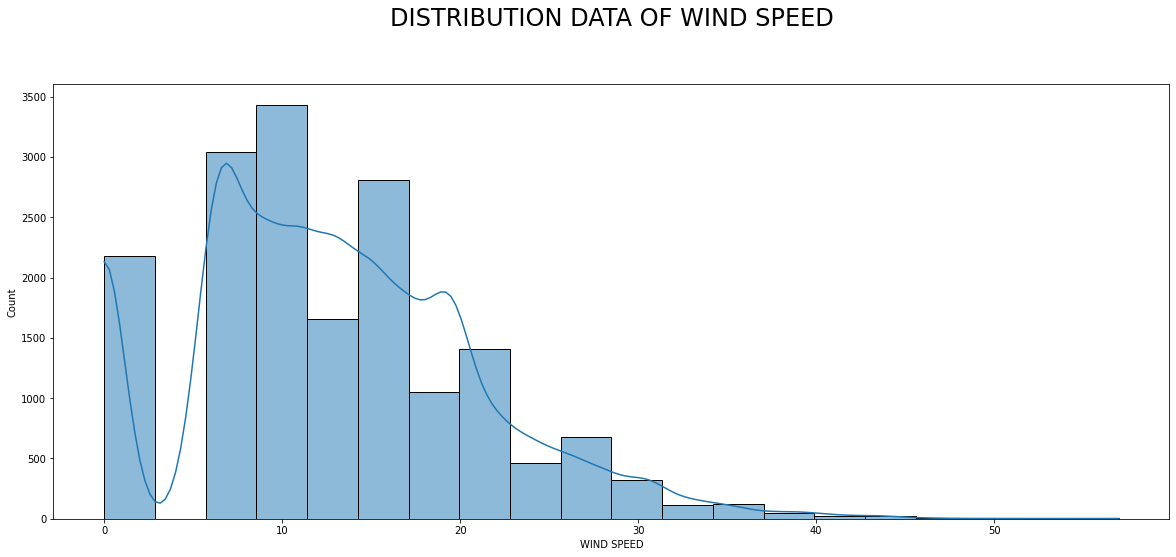

In [70]:
plt.figure(figsize=(20,8))
sns.histplot(bike['windspeed'], bins=20, kde=True)
plt.xlabel('WIND SPEED')
plt.title('DISTRIBUTION DATA OF WIND SPEED', size=24, y=1.12)                                          
plt.show()

###CASUAL

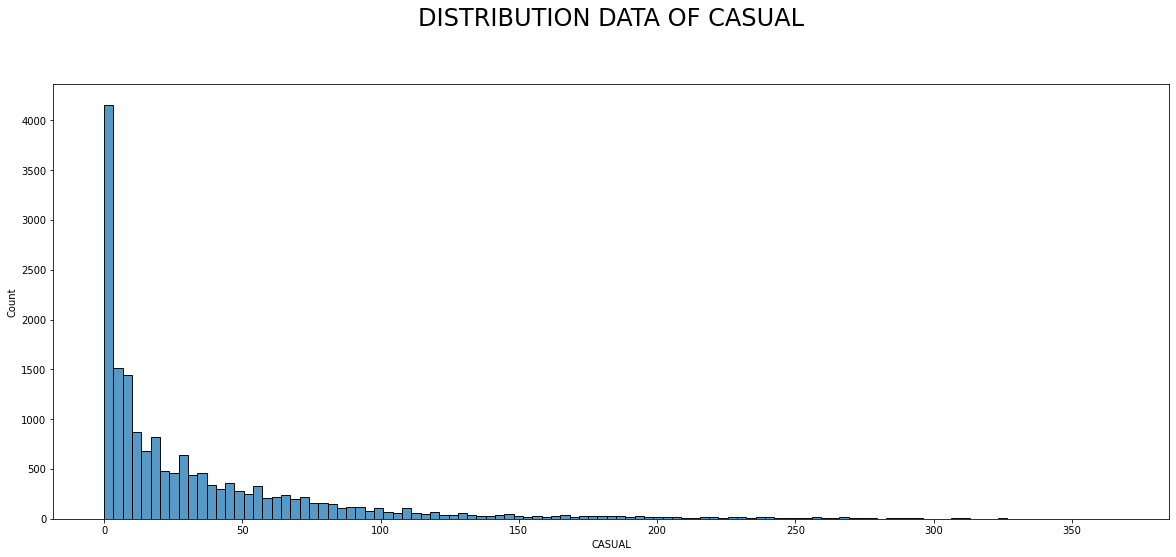

In [71]:
plt.figure(figsize=(20,8))
sns.histplot(bike['casual'])
plt.xlabel('CASUAL')
plt.title('DISTRIBUTION DATA OF CASUAL', size=24, y=1.12)                                          
plt.show()

###REGISTERED

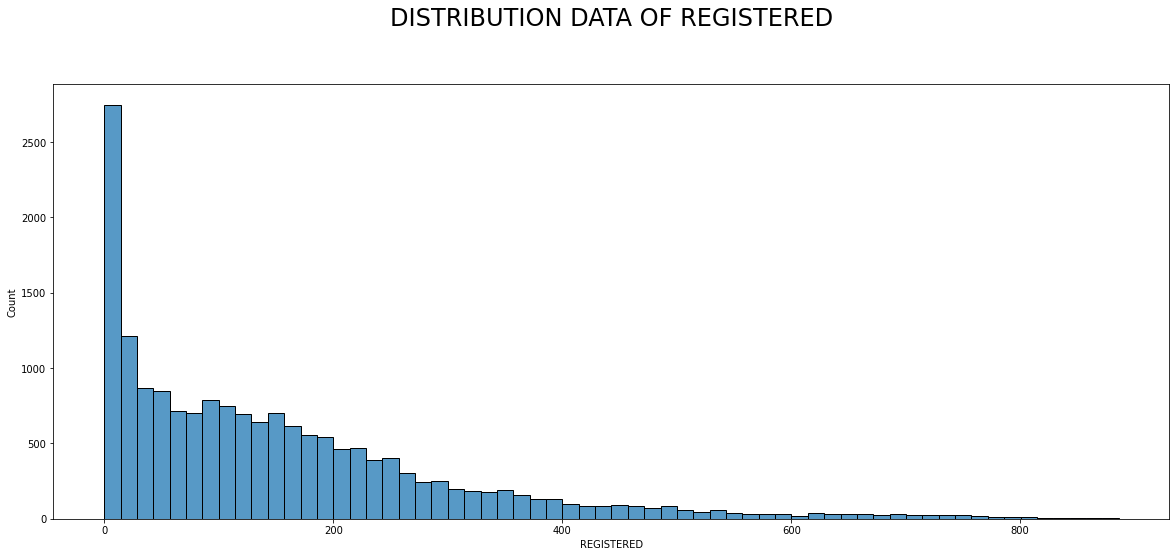

In [72]:
plt.figure(figsize=(20,8))
sns.histplot(bike['registered'])
plt.xlabel('REGISTERED')
plt.title('DISTRIBUTION DATA OF REGISTERED', size=24, y=1.12)                                          
plt.show()

###COUNT

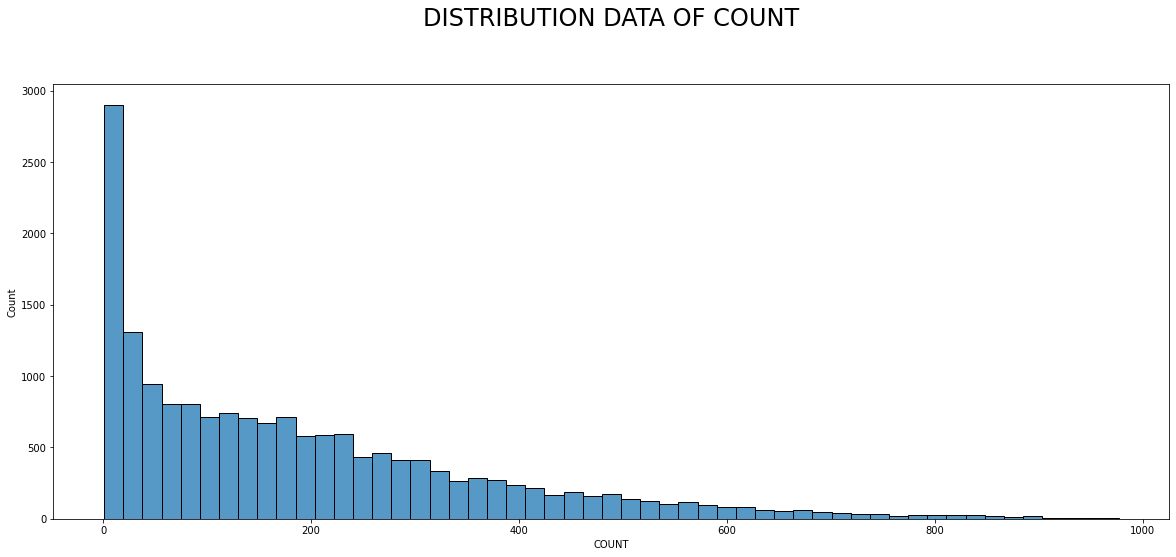

In [73]:
plt.figure(figsize=(20,8))
sns.histplot(bike['count'])
plt.xlabel('COUNT')
plt.title('DISTRIBUTION DATA OF COUNT', size=24, y=1.12)                                          
plt.show()

### **CORRELATION MATRIX**

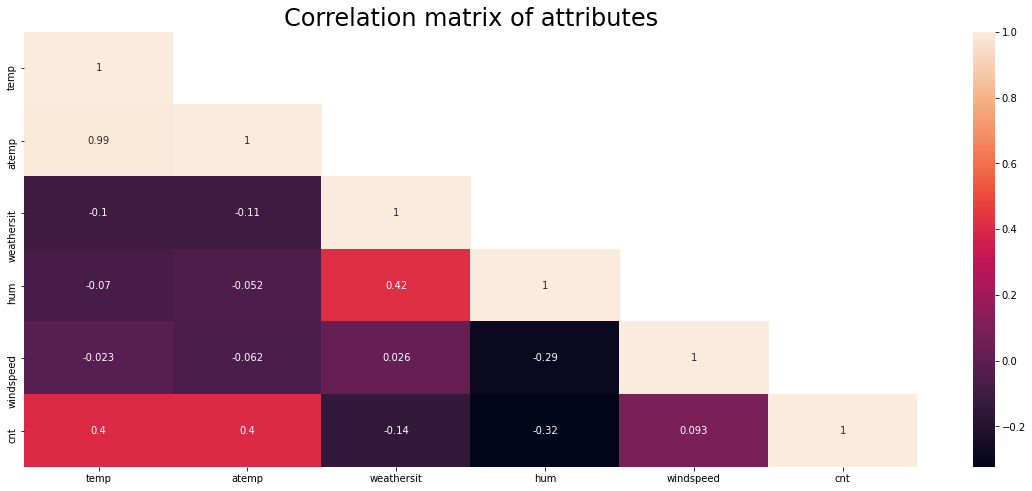

In [74]:
correMtr=df[['temp','atemp','weathersit','hum','windspeed','cnt']].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(20,8))
sns.heatmap(correMtr,mask=mask,annot=True)
ax.set_title('Correlation matrix of attributes', size=24, y=1.12)
plt.show()

Based on EDA and Correlation Matrix we can conclude that: <br>

1.   The seasonal effect is too high in bike usage and also, there are different demand levels among the months in the same season. That’s why, both season and month should be used as inputs in the model.
2.   The summation of bike usage in 2012 is higher than 2011 which means that both the number of users and de-mand of the system increased by time, so the year attribute should also be used as input in the model.
3. The bike usage is at maximum especially in rush hours. By looking at the relationship between cnt and hr closer, it can be seen that the hours 7, 8, 9, 17, 18, 19, and 20 have different characteristics in working days.
4. As for the weather condition, temperature, humidity and windspeed will be use also as input in the model because in correlation matrix they showed a significant contribution.
5. We do not use atemp because the correlation with the temp is almost one, which if we use atemp it would cause multicollinearity to temp.
6. We do not use casual and registered because the main problem here is to predict the whole number of bike instead of clustering how many bike rented by casual user and registered user





In [75]:
bike.columns

Index(['dteday', 'season', 'year', 'month', 'hr', 'is_holiday', 'weekday',
       'is_workingday', 'weather_condition', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'day', 'date'],
      dtype='object')

In [76]:
data = bike[['season', 'year', 'month','day', 'hr', 'is_holiday',
             'is_workingday', 'weather_condition', 'temp','humidity',
             'windspeed','count']]

In [77]:
data.to_csv(r'/content/drive/MyDrive/Colab_Notebooks/Project/Bike_Sharing/Dataset/bike.csv', index = False, header=True)